# Predicting Customer Churn in Telecom: A Data-driven Approach

## Introduction
In the dynamic landscape of the telecommunications industry, customer retention is crucial for sustainable business growth. The phenomenon of customer churn, where subscribers terminate their services, presents a significant challenge for telecom companies. By leveraging advanced analytics and machine learning techniques, telecom providers can anticipate churn events and implement proactive strategies to mitigate attrition. This study focuses on predicting customer churn in the telecom sector through the analysis of comprehensive customer activity data.

## Dataset Description
The telecom churn dataset comprises thoroughly cleaned customer activity data, encompassing a wide array of features that encapsulate subscribers' interactions with the telecom service. These features include demographic information, usage patterns, call records, internet usage, and customer service interactions, among others. Each entry in the dataset is labeled with a churn indicator, specifying whether the customer has canceled their subscription within a certain time frame.

## Objective
The primary objective of this study is to develop predictive models capable of accurately forecasting customer churn in the telecom domain. By analyzing the rich information contained within the dataset, the study aims to identify key factors driving churn and construct predictive models that can anticipate churn events with high precision and recall.

## Methodology
1. **Data Preprocessing:** The dataset undergoes rigorous preprocessing steps, including handling missing values, encoding categorical variables, scaling numerical features, and potentially performing feature engineering to extract meaningful insights.
   
2. **Exploratory Data Analysis (EDA):** EDA is conducted to gain insights into the dataset's characteristics and uncover patterns or correlations between features and churn. Visualization techniques such as histograms, scatter plots, and correlation matrices are employed to elucidate relationships within the data.
   
3. **Model Selection:** Various machine learning algorithms, including logistic regression, decision trees, random forests, support vector machines (SVM), and gradient boosting methods, are considered for model development. Ensemble learning and hyperparameter tuning may be utilized to enhance model performance.
   
4. **Model Evaluation:** The performance of each predictive model is evaluated using metrics such as accuracy, precision, recall, F1-score, and receiver operating characteristic (ROC) curve analysis. Cross-validation techniques are employed to ensure the robustness of the models and mitigate overfitting.
   
5. **Feature Importance Analysis:** Feature importance analysis is conducted to ascertain the relative contribution of different features towards predicting churn. This helps in identifying critical factors that influence customer attrition and informs strategic decision-making for churn mitigation efforts.

## Conclusion
By leveraging comprehensive customer activity data and employing advanced analytics techniques, this study aims to provide valuable insights into customer churn prediction in the telecom industry. The developed predictive models hold the potential to assist telecom providers in proactively identifying at-risk customers and implementing targeted retention strategies, thereby reducing churn rates and fostering long-term customer relationships.

## Future Directions
Future research endeavors could explore the integration of additional data sources, such as sentiment analysis of customer interactions and social media data, to further enhance the predictive accuracy of churn models. Additionally, ongoing refinement of model algorithms and the adoption of advanced techniques such as deep learning could offer new avenues for improving churn prediction capabilities.


In [2]:
import pandas as pd
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import math
import numpy as np

In [3]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def analyze_dataset(df):
    """
    Analyze the telecom churn dataset.

    Parameters:
    df (DataFrame): Input DataFrame containing the telecom churn dataset.

    Returns:
    None
    """
    print(df.info())

    print("Rows     : ", df.shape[0])
    print("Columns  : ", df.shape[1])

    print("\nFeatures : \n", df.columns.tolist())

    print("\nMissing values :  ", df.isnull().sum().values.sum())

    print("\nUnique values :  \n", df.nunique())


df = pd.read_csv('/kaggle/input/telecom-churn/churn-bigml-20.csv')
analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## Variable Breakdown

1. **STATE**: 
   - 51 Unique States in United States of America.

2. **Account Length**: 
   - Length of The Account.

3. **Area Code**: 
   - 415 relates to San Francisco, 408 is of San Jose, and 510 is of City of Oakland.

4. **International Plan**: 
   - "Yes" indicates International Plan is Present, "No" indicates no subscription for International Plan.

5. **Voice Mail Plan**: 
   - "Yes" indicates Voice Mail Plan is Present, "No" indicates no subscription for Voice Mail Plan.

6. **Number vmail messages**: 
   - Number of Voice Mail Messages ranging from 0 to 50.

7. **Total day minutes**: 
   - Total Number of Minutes Spent By Customers in Morning.

8. **Total day calls**: 
   - Total Number of Calls made by Customer in Morning.

9. **Total day charge**: 
   - Total Charge to the Customers in Morning.

10. **Total eve minutes**: 
   - Total Number of Minutes Spent By Customers in Evening.

11. **Total eve calls**: 
   - Total Number of Calls made by Customer in Evening.

12. **Total eve charge**: 
   - Total Charge to the Customers in Morning.

13. **Total night minutes**: 
   - Total Number of Minutes Spent By Customers in the Night.

14. **Total night calls**: 
   - Total Number of Calls made by Customer in Night.

15. **Total night charge**: 
   - Total Charge to the Customers in Night.

These variables provide insights into customer behavior, preferences, and usage patterns within different time periods and service offerings. Analyzing them can help in understanding customer segmentation, identifying high-value customers, detecting churn indicators, and formulating targeted marketing strategies or retention efforts tailored to specific customer needs.


## Checking the Churn Rate


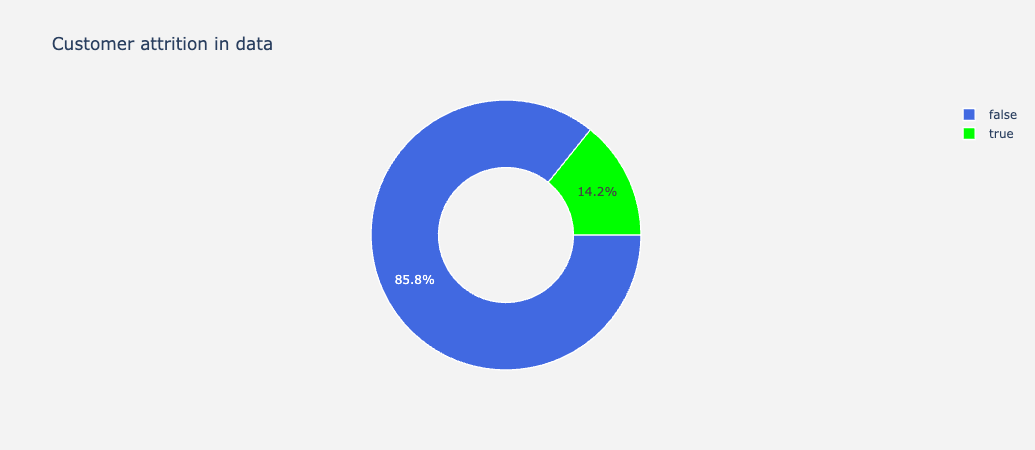

In [6]:
def plot_churn_pie_chart(df):
    """
    Plot a pie chart showing customer attrition in the dataset.

    Parameters:
    df (DataFrame): Input DataFrame containing the churn data.

    Returns:
    None
    """
    lab = df["Churn"].value_counts().keys().tolist()

    val = df["Churn"].value_counts().values.tolist()

    trace = go.Pie(labels=lab,
                   values=val,
                   marker=dict(colors=['royalblue', 'lime'],
                               line=dict(color="white", width=1.3)
                               ),
                   rotation=90,
                   hoverinfo="label+value+text",
                   hole=0.5
                   )

    layout = go.Layout(dict(title="Customer attrition in data",
                            plot_bgcolor="rgb(243,243,243)",
                            paper_bgcolor="rgb(243,243,243)",
                            )
                       )

    data = [trace]

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig)

plot_churn_pie_chart(df)

## Addressing Imbalance with SMOTE Technique

### Overview
After examining the distribution of churn data in the dataset, it was observed that the dataset is highly imbalanced. Specifically, the majority class (non-churned customers) significantly outweighs the minority class (churned customers). To mitigate the challenges posed by this class imbalance and to enhance the performance of predictive models, it is imperative to employ techniques that address this imbalance effectively.

### Importance of SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a widely used method for handling imbalanced datasets. It works by generating synthetic samples for the minority class, thereby increasing its representation in the dataset. By artificially balancing the class distribution, SMOTE helps prevent the model from being biased towards the majority class and improves its ability to accurately classify instances of the minority class.

### Benefits of Using SMOTE
- **Improved Model Performance:** Balancing the class distribution with SMOTE often leads to better performance metrics, such as precision, recall, and F1-score, especially for the minority class.
- **Reduced Risk of Misclassification:** SMOTE reduces the risk of misclassifying minority class instances as the majority class (false negatives), thus enhancing the reliability of the model's predictions.
- **Enhanced Generalization:** SMOTE-generated synthetic samples introduce additional variability into the dataset, aiding the model in generalizing better to unseen data and capturing the underlying patterns of the minority class more effectively.

Incorporating SMOTE technique into the dataset preprocessing stage is crucial for addressing the challenges posed by imbalanced datasets, particularly in scenarios such as predicting customer churn where accurate identification of the minority class is paramount for business decision-making.


In [7]:
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

df = df.drop('Account length',axis=1)
df['Area code'].unique()

array([408, 415, 510])

In [8]:
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

## Checking Voice-Mail Feature

In [9]:
print('Unique vmail messages',df['Number vmail messages'].unique())
df['Number vmail messages'].describe()

Unique vmail messages [ 0 30 33 29 32 27 22 23 41 48 24 34 37 35 21 26 16 20 18 31 14 28 39 36
 45 51 38 11 19 15 25 40 49 17 42 13 46]


count    667.000000
mean       8.407796
std       13.994480
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max       51.000000
Name: Number vmail messages, dtype: float64

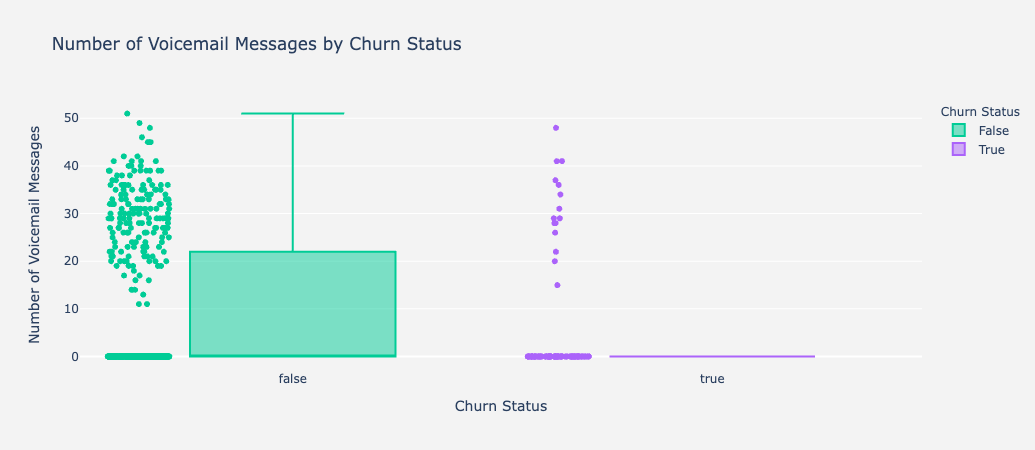

In [10]:
def plot_boxplot(df):
    """
    Create a boxplot using Plotly for the given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Number vmail messages', points="all", title="Number of Voicemail Messages by Churn Status",
                 labels={"Churn": "Churn Status", "Number vmail messages": "Number of Voicemail Messages"},
                 color="Churn",
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot(df)


## Voice Mail Feature Analysis and Hypothesis

## Findings:
Upon analyzing the Voice Mail feature in the dataset, it was observed that when a customer receives more than 20 voice-mail messages, there is a notable increase in churn. This finding suggests a correlation between excessive use of the Voice Mail service and customer attrition.

## Hypothesis:
Based on the findings, the following hypotheses are proposed:

1. **Voice Mail Service Upgradation**: There might be a need for upgrading the Voice Mail service to better meet the needs and expectations of customers. This could involve enhancing features, improving user experience, or introducing additional functionalities.

2. **Setting a Limit on Voice Mail Service**: It is hypothesized that setting a limit on the number of voice-mail messages, preferably no more than 25, could help in retaining customers. By imposing a limit, customers are encouraged to manage their voice-mail usage more efficiently, reducing the likelihood of churn.

3. **Quality Drop in Voice Mail after 25 Voice Mails**: Beyond a certain threshold, such as 25 voice-mails, it is anticipated that there might be a drop in the quality of service or user experience. This decline in quality could contribute to customer dissatisfaction and ultimately lead to churn.

## Recommendations:
To address the potential impact of voice-mail usage on customer churn, the following recommendations are proposed:

- **Evaluate Voice Mail Service**: Conduct a thorough evaluation of the existing Voice Mail service to identify areas for improvement and enhancement. Solicit feedback from customers to understand their pain points and expectations regarding the service.

- **Implement Usage Limits**: Consider implementing usage limits on the number of voice-mail messages a customer can receive or store. Setting a reasonable threshold, such as 25 voice-mails, can help in managing customer expectations and preventing overload.

- **Enhance User Experience**: Focus on enhancing the user experience of the Voice Mail service by improving interface design, adding features for customization and organization, and ensuring reliability and responsiveness.

- **Monitor and Analyze Usage Patterns**: Continuously monitor and analyze usage patterns of the Voice Mail service to identify trends and anomalies. This information can inform strategic decisions regarding service upgrades, feature additions, and usage policies.

By proactively addressing the findings and hypotheses related to the Voice Mail feature, telecom companies can optimize their services, improve customer satisfaction, and reduce churn rates.


### Total-Minutes in Morning Affecting the Churn Rate

In [11]:
def analyze_total_day_minutes(df):
    """
    Analyze the 'Total day minutes' feature in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing the 'Total day minutes' feature.

    Returns:
    None
    """
    max_minutes = df['Total day minutes'].max()
    min_minutes = df['Total day minutes'].min()
    avg_minutes = df['Total day minutes'].mean()

    print('Maximum number of minutes:', max_minutes, 'i.e. Max number of Hours spent:', round(max_minutes / 60))
    print('Minimum number of minutes:', min_minutes)
    print('Average number of minutes:', avg_minutes)

analyze_total_day_minutes(df)

Maximum number of minutes: 334.3 i.e. Max number of Hours spent: 6
Minimum number of minutes: 25.9
Average number of minutes: 180.94812593703148


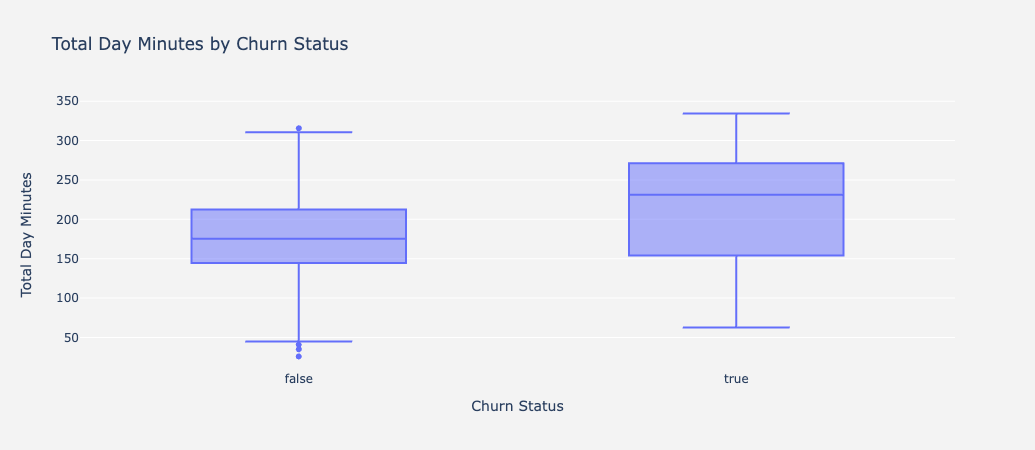

In [12]:
def plot_boxplot_total_day_minutes(df):
    """
    Create a boxplot using Plotly for 'Total day minutes' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total day minutes', title="Total Day Minutes by Churn Status",
                 labels={"Churn": "Churn Status", "Total day minutes": "Total Day Minutes"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_total_day_minutes(df)

### Inference from Total Day Minutes Analysis

Based on the analysis of total minutes spent in the morning, the following inference can be drawn from the box plot:

- Users who spend 225 minutes or more, approximately 4 hours, tend to switch to other operators. This indicates a potential correlation between extended usage periods and customer churn.

### Hypothesis for Factors Influencing Churn:

1. **Network Disturbance during a Call**: It is hypothesized that instances of network disturbance or interruptions during calls may contribute to customer dissatisfaction and churn. Improvements in network stability and reliability are essential to mitigate this issue.

2. **Cracking Sound or Noise during a Call**: The presence of cracking sounds or background noise during calls can significantly impact call quality and user experience. Addressing this issue by optimizing network infrastructure and enhancing call quality is crucial for customer retention.

3. **Need to Upgrade or Make Smarter Use of Technologies like VoLTE**: The adoption of advanced technologies such as Voice over LTE (VoLTE) can improve voice quality and enhance the overall calling experience for customers. Upgrading network infrastructure and promoting the use of VoLTE can help in reducing instances of call disruptions and improving customer satisfaction.

4. **Network Upgradation**: Continuous network upgradation and optimization are essential to meet the increasing demands for data and voice services. Investing in network expansion, modernization, and capacity enhancement can ensure better service delivery and minimize customer churn due to network-related issues.

Addressing these factors through proactive measures and technological advancements can help telecom companies mitigate customer churn and improve overall service quality, thereby fostering customer loyalty and retention.


In [13]:
def analyze_total_day_calls(df):
    """
    Analyze the 'Total day calls' feature in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing the 'Total day calls' feature.

    Returns:
    None
    """
    max_calls = df['Total day calls'].max()
    min_calls = df['Total day calls'].min()
    avg_calls = df['Total day calls'].mean()

    print('Maximum number of calls:', max_calls)
    print('Minimum number of calls:', min_calls)
    print('Average number of calls:', int(avg_calls))

analyze_total_day_calls(df)

Maximum number of calls: 165
Minimum number of calls: 30
Average number of calls: 100


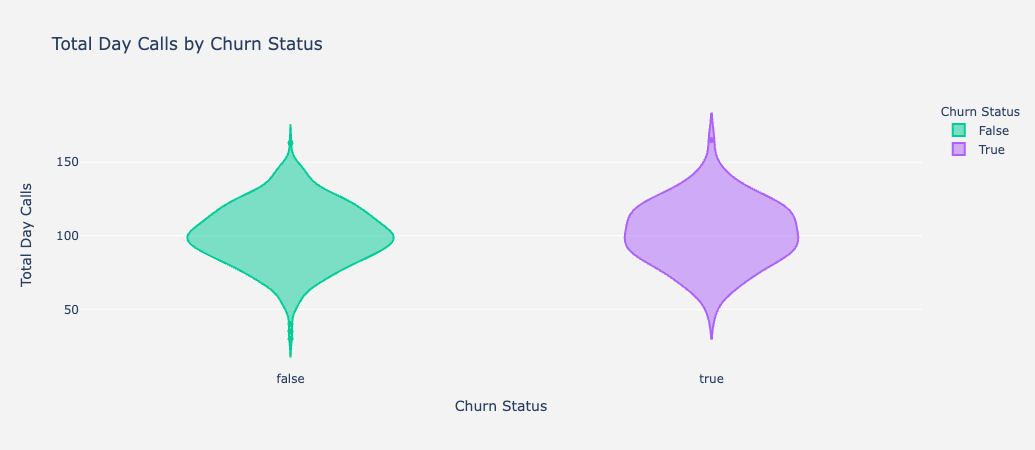

In [14]:
def plot_violin_total_day_calls(df):
    """
    Create a violin plot using Plotly for 'Total day calls' feature by 'Churn' status with custom colors.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot.

    Returns:
    None
    """
    colors = {'False': 'royalblue', 'True': 'lime'}

    fig = px.violin(df, x='Churn', y='Total day calls', title="Total Day Calls by Churn Status",
                    labels={"Churn": "Churn Status", "Total day calls": "Total Day Calls"},
                    category_orders={"Churn": ["False", "True"]},
                    violinmode='overlay', 
                    color='Churn', 
                    color_discrete_map=colors)

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_violin_total_day_calls(df)

### Inference from Violin Plot Analysis

From the violin plot analysis of the 'Total day calls' feature, the following inference can be made:

- **Average Number of Calls**: On average, around 100 calls are made by customers, which is a positive indication for the company. It suggests that customers are actively engaging with the telecom services.

- **Difference in Median for Churn Customers**: However, it is observed that for churned customers, the median number of calls is slightly higher than 100. This difference in median suggests that there may be instances of call drops or interruptions for churned customers, leading to more calls being made in the morning.

This finding indicates a potential issue with call quality or network reliability for churned customers, which could contribute to their dissatisfaction and ultimately lead to churn.


In [15]:
def analyze_total_day_charge(df):
    """
    Analyze the 'Total day charge' feature in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing the 'Total day charge' feature.

    Returns:
    None
    """
    max_charge = df['Total day charge'].max()
    min_charge = df['Total day charge'].min()
    avg_charge = df['Total day charge'].mean()

    print('Maximum number of charge:', max_charge)
    print('Minimum number of charge:', min_charge)
    print('Average number of charge:', round(avg_charge, 2))

analyze_total_day_charge(df)


Maximum number of charge: 56.83
Minimum number of charge: 4.4
Average number of charge: 30.76


### Inference on Average Total Day Charge

The analysis reveals that the average total day charge is approximately $30, which indicates a decent pricing strategy employed by the telecom company.

This pricing strategy seems to strike a balance between affordability for customers and revenue generation for the company. It suggests that the company has priced its services competitively, attracting customers while also ensuring profitability.

Overall, the average total day charge of around $30 reflects a reasonable pricing approach that aligns with market dynamics and customer expectations.

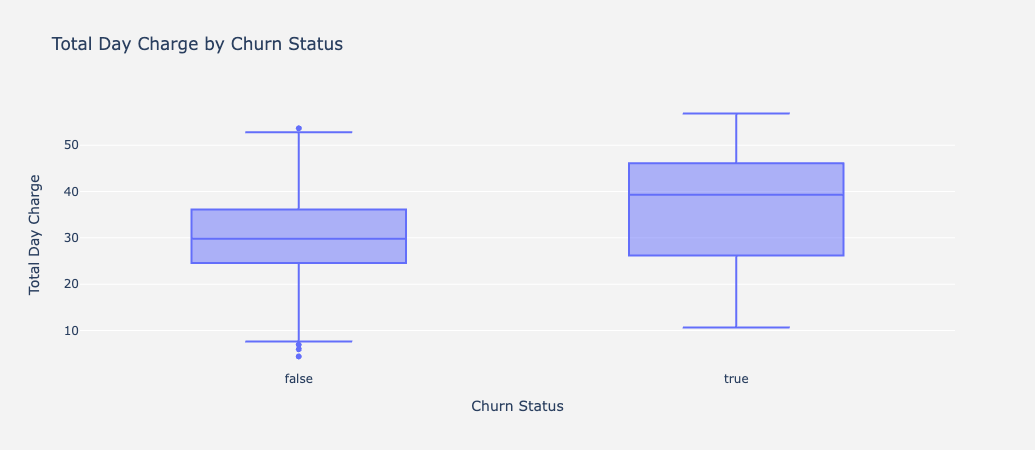

In [16]:
def plot_boxplot_total_day_charge(df):
    """
    Create a boxplot using Plotly for 'Total day charge' feature by 'Churn' status with two colors.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot.

    Returns:
    None
    """

    fig = px.box(df, x='Churn', y='Total day charge', title="Total Day Charge by Churn Status",
                 labels={"Churn": "Churn Status", "Total day charge": "Total Day Charge"},
                 category_orders={"Churn": ["False", "True"]},
                 color_discrete_map={"False": "blue", "True": "red"})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_total_day_charge(df)

### Strategy Based on Box-Plot Analysis

From the inferred box-plots, a clear strategy can be indicated:

- **Observation**: Customers who spend more minutes on the network tend to leave the subscription.

- **Analysis**: The box-plot suggests a defect in the pricing strategy of the company.

### Hypothesis for Strategy Implementation:

1. **Re-evaluation of Pricing Strategy**: It is hypothesized that the pricing strategy needs to be re-evaluated to address the observed defect. This may involve analyzing the current pricing model, assessing competitors' pricing strategies, and conducting customer surveys to understand pricing preferences.

2. **Offering Discounts for High Call Minutes and Calls**: It is hypothesized that offering discounts to clients who have high call minutes and call volumes may help in retaining them. By providing incentives such as discounted rates or bonus minutes, the company can incentivize customers to stay subscribed and increase loyalty.

Implementing these hypotheses can potentially mitigate customer churn and improve overall customer satisfaction. However, careful analysis and testing are necessary to evaluate the effectiveness of these strategies and ensure positive outcomes for both the company and its customers.


### Inference on Evening time Affecting the Churn Rate

In [17]:
def summarize_evening_minutes(df):
    """
    This function summarizes the evening minutes in a DataFrame.
    
    Args:
    df (DataFrame): A pandas DataFrame containing a column 'Total eve minutes' which records
                    the total evening minutes spent.
                    
    The function prints:
    - Maximum number of minutes and its equivalent in hours.
    - Minimum number of minutes.
    - Average number of minutes.
    """
    max_minutes = df['Total eve minutes'].max()
    max_hours = round(max_minutes / 60)
    
    print(f'Maximum number of minutes: {max_minutes}, i.e. Max number of Hours spent: {max_hours}')
    
    min_minutes = df['Total eve minutes'].min()
    print(f'Minimum number of minutes: {min_minutes}')

    avg_minutes = df['Total eve minutes'].mean()
    print(f'Average number of minutes: {avg_minutes:.2f}')

summarize_evening_minutes(df)

Maximum number of minutes: 361.8, i.e. Max number of Hours spent: 6
Minimum number of minutes: 48.1
Average number of minutes: 203.36


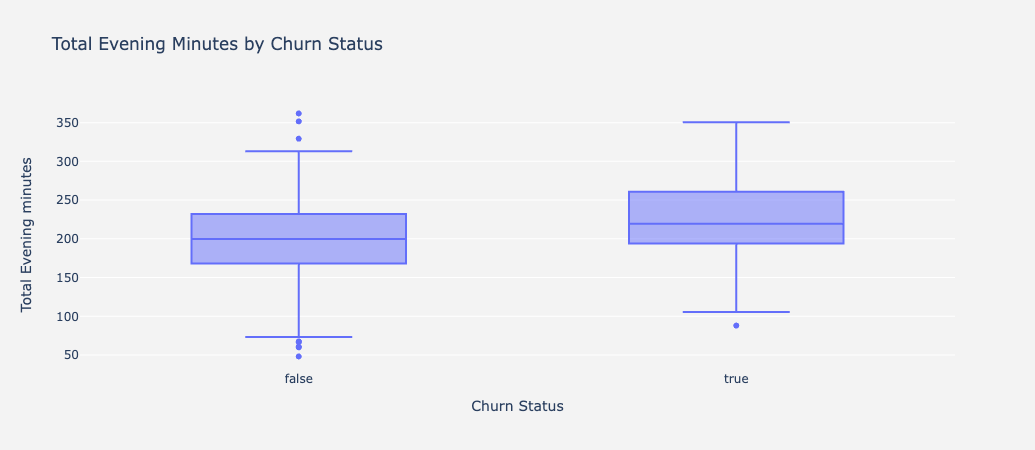

In [18]:
def plot_boxplot_eve_minutes(df):
    """
    Create a boxplot using Plotly for 'Total Evening Minutes' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total eve minutes', title="Total Evening Minutes by Churn Status",
                 labels={"Churn": "Churn Status", "Total eve minutes": "Total Evening minutes"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_eve_minutes(df)

**Key Findings**

**Maximum Evening Usage**: The highest recorded evening call duration was 361.8 minutes, which translates to approximately 6 hours. This outlier suggests that there are customers who extensively use their evening minutes, possibly indicating high satisfaction with the service or a specific need that our plans cater well to.

**Minimum Usage Observed**: On the other end of the spectrum, the shortest call duration during the evening was only 48.1 minutes. This minimal usage could signal underutilization of the services we provide, possibly due to dissatisfaction or a mismatch between customer needs and the features offered in their current plan.

**Average Usage**: The average evening call duration among our customers stands at 203.36 minutes. This average suggests that a typical customer spends over three hours on the phone each evening, which underscores the importance of evening call quality and pricing in customer retention.

In [19]:
def summarize_evening_calls(df):
    """
    This function summarizes evening call statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total eve calls' which records
                    the number of evening calls made by customers.

    The function prints:
    - Maximum number of evening calls.
    - Minimum number of evening calls.
    - Average number of evening calls.
    """
    
    max_calls = df['Total eve calls'].max()
    print('Maximum number of calls:', max_calls)
    
    min_calls = df['Total eve calls'].min()
    print('Minimum number of calls:', min_calls)
    
    avg_calls = df['Total eve calls'].mean()
    print('Average number of calls:', avg_calls)

summarize_evening_calls(df)


Maximum number of calls: 168
Minimum number of calls: 37
Average number of calls: 100.4767616191904


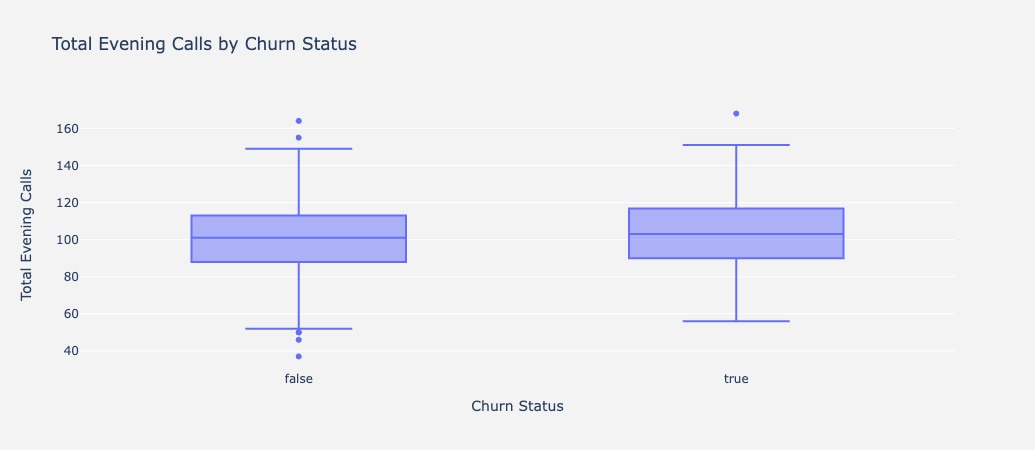

In [20]:
def plot_boxplot_eve_calls(df):
    """
    Create a boxplot using Plotly for the 'Total Evening Calls' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total eve calls'
                    and 'Churn' columns.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total eve calls', title="Total Evening Calls by Churn Status",
                 labels={"Churn": "Churn Status", "Total eve calls": "Total Evening Calls"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_eve_calls(df)

**Key Findings**

**Maximum Call Volume**: The highest number of calls made by a single customer in the evening peaked at 168. This exceptional usage suggests that there are power users who heavily rely on our services during evening hours, possibly due to business needs or personal preferences.

**Minimum Call Volume**: At the other end, the lowest number of calls recorded was 37. This indicates a segment of our customer base that either uses our services sparingly or prefers other modes of communication during these hours.

**Average Call Volume**: On average, customers made about 100 calls in the evenings. This figure suggests a moderate level of engagement across our customer base, with the evening period being reasonably active.

In [21]:
def summarize_evening_charges(df):
    """
    This function summarizes evening charge statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total eve charge' which records
                    the charges for evening usage.

    The function prints:
    - Maximum charge for evening usage.
    - Minimum charge for evening usage.
    - Average charge for evening usage.
    """
    
    max_charge = df['Total eve charge'].max()
    print('Maximum number of charge:', max_charge)
    
    min_charge = df['Total eve charge'].min()
    print('Minimum number of charge:', min_charge)
    
    avg_charge = df['Total eve charge'].mean()
    print('Average number of charge:', avg_charge)

summarize_evening_charges(df)

Maximum number of charge: 30.75
Minimum number of charge: 4.09
Average number of charge: 17.285262368815594


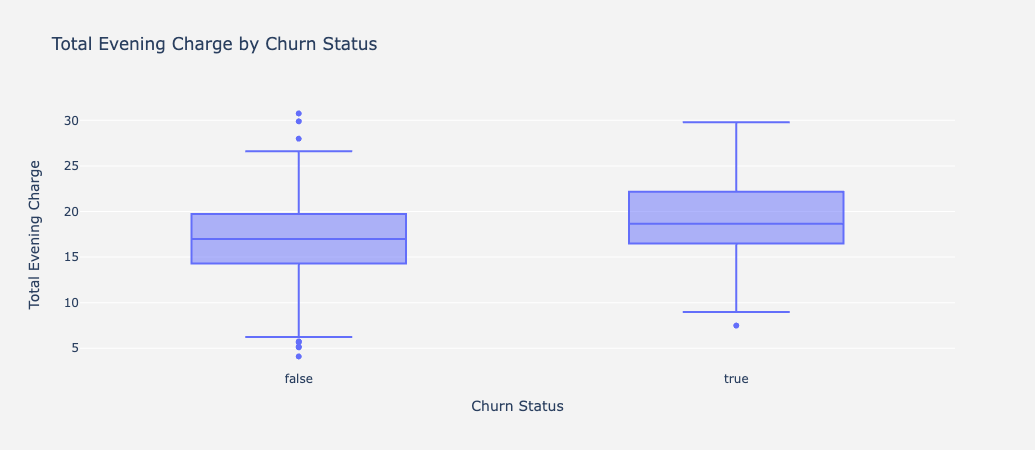

In [22]:
def plot_boxplot_eve_charge(df):
    """
    Create a boxplot using Plotly for the 'Total Evening Charge' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total eve charge'
                    and 'Churn' columns.

    Returns:
    None
    """

    fig = px.box(df, x='Churn', y='Total eve charge', title="Total Evening Charge by Churn Status",
                 labels={"Churn": "Churn Status", "Total eve charge": "Total Evening Charge"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_eve_charge(df)

**Key Findings**

**Maximum Evening Charge**:The data reveals that the highest charge for a single evening's usage was $30.75. This peak figure likely represents a scenario of extensive usage or high tariff rates being applied. Customers experiencing such high charges might perceive a lower value for money if they do not perceive corresponding high quality of service, potentially increasing churn risk.

**Minimum Evening Charge**: On the opposite end, the lowest recorded evening charge was only $4.09. This minimal charge could indicate infrequent use or limited need for evening services. Customers with such low usage and charges may not see the full benefit of their service plans, which could also lead to churn due to perceived underutilization.

**Average Evening Charge**: The average evening charge across our customer base was approximately $17.29. This average suggests that most of our customers incur a moderate charge for evening usage, pointing to a balanced usage pattern for the majority.

### Inference on Night Time Affecting Churn Rate

In [23]:
def summarize_night_minutes(df):
    """
    This function summarizes night minute statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total night minutes' which records
                    the minutes spent during night-time.

    The function prints:
    - Maximum number of minutes spent during the night and its equivalent in hours.
    - Minimum number of minutes spent during the night.
    - Average number of minutes spent during the night.
    """

    max_minutes = df['Total night minutes'].max()
    max_hours = round(max_minutes / 60, 2)
    
    print(f'Maximum number of minutes: {max_minutes}, i.e. Max number of Hours spent: {max_hours}')
    
    min_minutes = df['Total night minutes'].min()
    print(f'Minimum number of minutes: {min_minutes}')
    
    avg_minutes = df['Total night minutes'].mean()
    print(f'Average number of minutes: {avg_minutes:.2f}')

summarize_night_minutes(df)


Maximum number of minutes: 367.7, i.e. Max number of Hours spent: 6.13
Minimum number of minutes: 23.2
Average number of minutes: 199.69


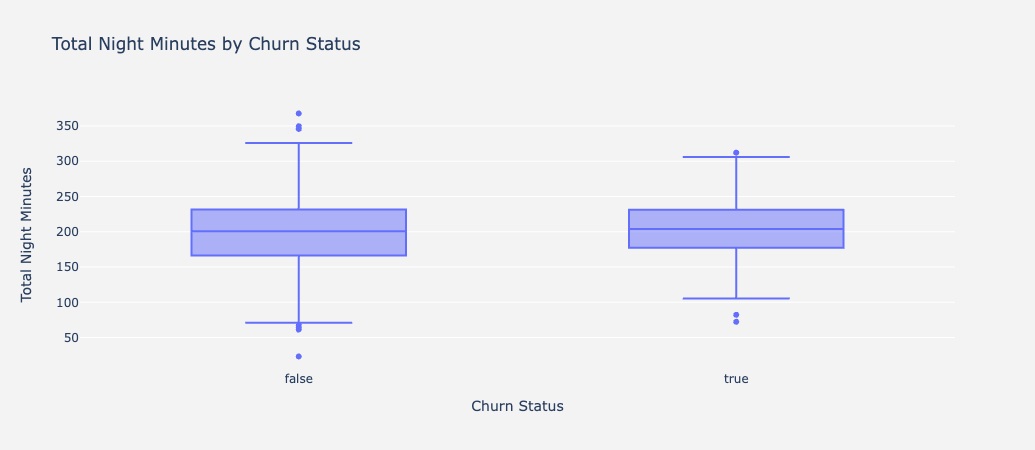

In [24]:
def plot_boxplot_night_minutes(df):
    """
    Create a boxplot using Plotly for the 'Total Night Minutes' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total night minutes'
                    and 'Churn' columns.

    Returns:
    None
    """
    
    fig = px.box(df, x='Churn', y='Total night minutes', title="Total Night Minutes by Churn Status",
                 labels={"Churn": "Churn Status", "Total night minutes": "Total Night Minutes"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_night_minutes(df)

**Key Findings**

**Extensive Night-Time Usage**: The analysis revealed a maximum night-time usage of 367.7 minutes, equating to approximately 6.13 hours in a single night. This notable extent of usage suggests a significant reliance on our services during the night, potentially by customers with night-time work schedules or those in different time zones.

**Minimal Usage**: At the lower end, the minimum recorded night-time usage was just 23.2 minutes. This stark contrast highlights the varied customer needs and usage patterns within our subscriber base.

**Average Usage**: The average night-time call duration stands at 199.69 minutes. This robust average indicates that a substantial portion of our customers actively use their phones during the night, which may include both personal and professional communications.

In [25]:
def summarize_night_calls(df):
    """
    This function summarizes night call statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total night calls' which records
                    the number of calls made during night-time.

    The function prints:
    - Maximum number of night calls.
    - Minimum number of night calls.
    - Average number of night calls.
    """

    max_calls = df['Total night calls'].max()
    print('Maximum number of calls:', max_calls)
    
    min_calls = df['Total night calls'].min()
    print('Minimum number of calls:', min_calls)
   
    avg_calls = df['Total night calls'].mean()
    print('Average number of calls:', avg_calls)

summarize_night_calls(df)

Maximum number of calls: 175
Minimum number of calls: 42
Average number of calls: 100.11394302848576


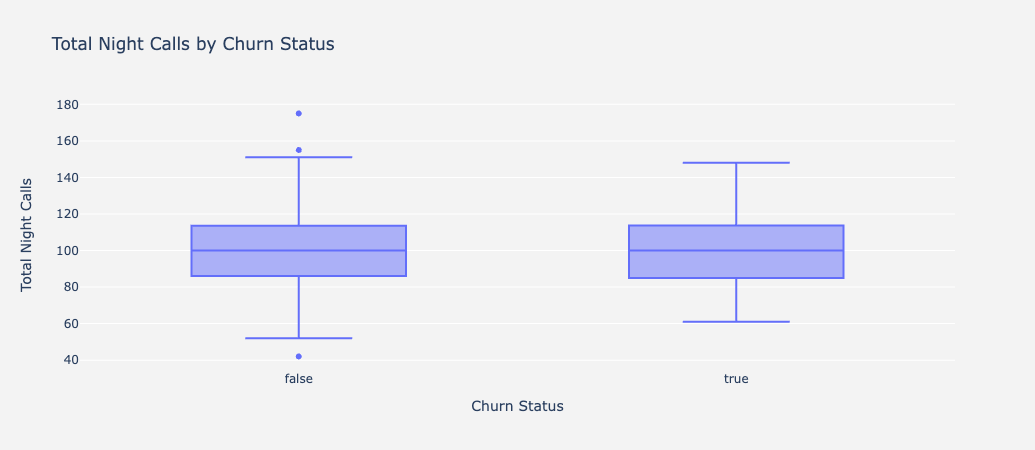

In [26]:
def plot_boxplot_night_calls(df):
    """
    Create a boxplot using Plotly for the 'Total Night Calls' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total night calls'
                    and 'Churn' columns.

    Returns:
    None
    """
    
    fig = px.box(df, x='Churn', y='Total night calls', title="Total Night Calls by Churn Status",
                 labels={"Churn": "Churn Status", "Total night calls": "Total Night Calls"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_night_calls(df)

**Key Findings**

**Variability in Call Volume**: The maximum number of night calls recorded was 175, indicating some customers are highly active during night hours. The minimum call count stood at 42, suggesting less engagement from other segments of our customer base during these hours. The average call activity was around 100 calls per night, reflecting a moderate level of engagement across the customer spectrum.

**Higher Call Volumes Among Churned Customers**: Notably, churned customers tend to make more calls on average during the night compared to those who remain with the service. This could suggest that despite higher usage, these customers might not be fully satisfied with their service experience or could have specific needs that are not being met effectively.

In [27]:
def summarize_night_charges(df):
    """
    This function summarizes night charge statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total night charge' which records
                    the charges for night-time usage.

    The function prints:
    - Maximum charge for night usage.
    - Minimum charge for night usage.
    - Average charge for night usage.
    """
    
    max_charge = df['Total night charge'].max()
    print('Maximum number of charge:', max_charge)
    
    min_charge = df['Total night charge'].min()
    print('Minimum number of charge:', min_charge)
    
    avg_charge = df['Total night charge'].mean()
    print('Average number of charge:', avg_charge)

summarize_night_charges(df)

Maximum number of charge: 16.55
Minimum number of charge: 1.04
Average number of charge: 8.985907046476763


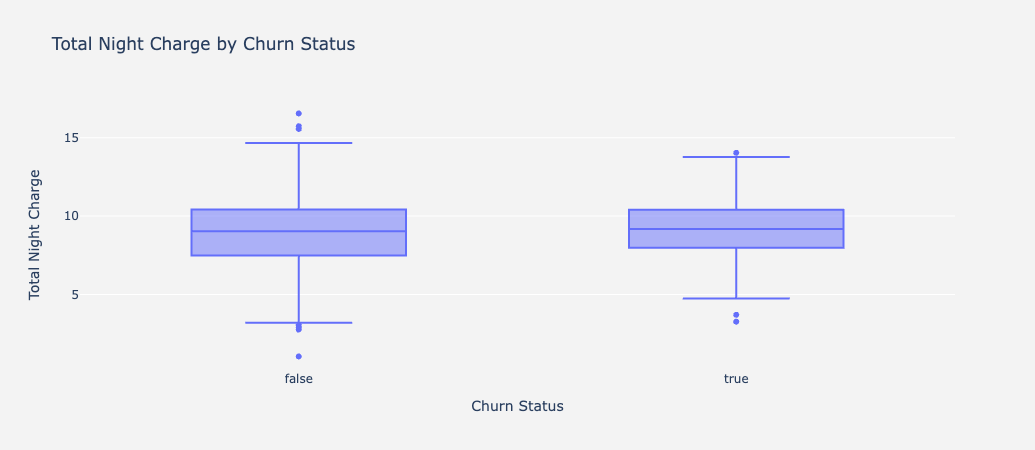

In [28]:
def plot_boxplot_night_charge(df):
    """
    Create a boxplot using Plotly for the 'Total Night Charge' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total night charge'
                    and 'Churn' columns.

    Returns:
    None
    """

    fig = px.box(df, x='Churn', y='Total night charge', title="Total Night Charge by Churn Status",
                 labels={"Churn": "Churn Status", "Total night charge": "Total Night Charge"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()


plot_boxplot_night_charge(df)

**Key Findings**

**Range of Night-Time Charges**:

* **Maximum Charge**: The highest charge recorded for night-time usage was $16.55. This peak could reflect extensive usage or potentially high tariff rates, which might not always correlate with customer satisfaction.

* **Minimum Charge**: The lowest charge was as modest as $1.04, suggesting either very limited use or very economical pricing for some users during these hours.

* **Average Charge**: The average night charge calculated across our customers was approximately $8.99. This indicates a moderate general expenditure on night-time services among our customers.

**Implications for Customer Loyalty**:

* The data suggests a substantial variability in charges, which might influence customer perceptions of value. High charges, especially if not matched with perceived value, could lead to dissatisfaction and churn.
* Conversely, very low charges might reflect underutilization of services, which could also indirectly lead to churn due to a lack of engagement with the service.

### Inference on International Calls Affecting the Churn Rate

In [29]:
def summarize_intl_minutes(df):
    """
    This function summarizes international call minutes statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total intl minutes' which records
                    the minutes spent on international calls.

    The function prints:
    - Maximum number of minutes spent on international calls and its equivalent in hours.
    - Minimum number of minutes spent on international calls.
    - Average number of minutes spent on international calls.
    """

    max_minutes = df['Total intl minutes'].max()
    max_hours = round(max_minutes / 60, 2)
    
    print(f'Maximum number of minutes: {max_minutes}, i.e. Max number of Hours spent: {max_hours}')
    
    min_minutes = df['Total intl minutes'].min()
    print(f'Minimum number of minutes: {min_minutes}')

    avg_minutes = df['Total intl minutes'].mean()
    print(f'Average number of minutes: {avg_minutes:.2f}')

summarize_intl_minutes(df)

Maximum number of minutes: 18.3, i.e. Max number of Hours spent: 0.3
Minimum number of minutes: 0.0
Average number of minutes: 10.24


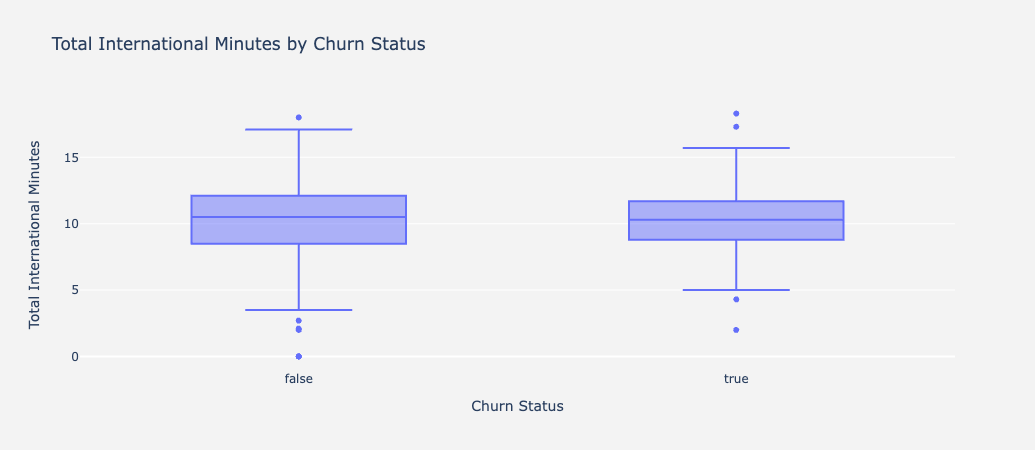

In [30]:
def plot_boxplot_intl_minutes(df):
    """
    Create a boxplot using Plotly for the 'Total International Minutes' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total intl minutes'
                    and 'Churn' columns.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total intl minutes', title="Total International Minutes by Churn Status",
                 labels={"Churn": "Churn Status", "Total intl minutes": "Total International Minutes"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_intl_minutes(df)

**Key Findings:**

**Variability in International Call Durations:**

* **Maximum Duration**: The longest international call recorded was 18.3 minutes. While this is relatively short, it shows that some customers do engage significantly with international calling, even if such instances are rare.
* **Minimum Duration**: The fact that the minimum call duration is 0.0 minutes indicates that there are customers who have the international calling feature but do not use it.
* **Average Duration**: The average international call duration across all customers is 10.24 minutes. This suggests that when customers do make international calls, they tend to be of moderate length.

**Implications for Customer Loyalty and Churn**:

* **Low Utilization Concerns**: The low maximum duration and a significant number of customers not using international calling at all could indicate underutilization of service features. This may suggest a lack of awareness about international calling options or perceived high costs.
* **Opportunities for Engagement**: The average call duration presents an opportunity to engage with customers to enhance their understanding and usage of international services. Educational campaigns or promotions could encourage higher usage, potentially increasing customer satisfaction and retention.


In [31]:
def summarize_intl_calls(df):
    """
    This function summarizes international call statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total intl calls' which records
                    the number of international calls made by customers.

    The function prints:
    - Maximum number of international calls.
    - Minimum number of international calls.
    - Average number of international calls.
    """
    max_calls = df['Total intl calls'].max()
    print('Maximum number of calls:', max_calls)
    
    min_calls = df['Total intl calls'].min()
    print('Minimum number of calls:', min_calls)
    
    avg_calls = df['Total intl calls'].mean()
    print('Average number of calls:', avg_calls)

summarize_intl_calls(df)

Maximum number of calls: 18
Minimum number of calls: 0
Average number of calls: 4.527736131934033


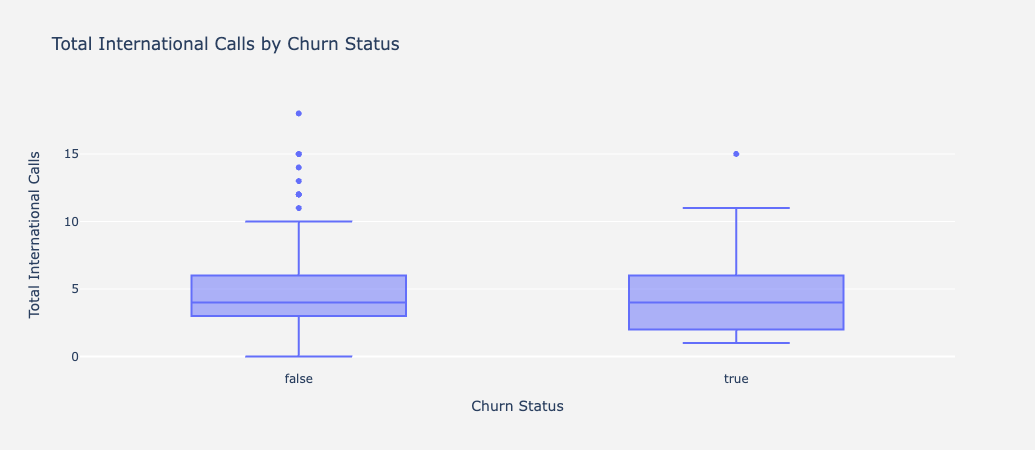

In [32]:
def plot_boxplot_intl_calls(df):
    """
    Create a boxplot using Plotly for the 'Total International Calls' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total intl calls'
                    and 'Churn' columns.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total intl calls', title="Total International Calls by Churn Status",
                 labels={"Churn": "Churn Status", "Total intl calls": "Total International Calls"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_intl_calls(df)

**Key Findings**

**Variability in International Call Frequency**:
* **Maximum Calls**: The highest frequency of international calls made by a single customer was 18 calls. This indicates a segment of customers with significant international communication needs.
* **Minimum Calls**: At the other end, the minimum number of international calls is 0, suggesting that there are customers who do not utilize their international calling feature at all.
* **Average Calls**: The average number of international calls per customer stands at approximately 4.53. This moderate average suggests that while international calling is utilized by some, it is not a primary service for the majority of our customer base.

In [33]:
def summarize_intl_charges(df):
    """
    This function summarizes international charge statistics from a DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the column 'Total intl charge' which records
                    the charges for international calls made by customers.

    The function prints:
    - Maximum charge for international calls.
    - Minimum charge for international calls.
    - Average charge for international calls.
    """
    max_charge = df['Total intl charge'].max()
    print('Maximum number of charge:', max_charge)
    
    min_charge = df['Total intl charge'].min()
    print('Minimum number of charge:', min_charge)
    
    avg_charge = df['Total intl charge'].mean()
    print('Average number of charge:', avg_charge)

summarize_intl_charges(df)

Maximum number of charge: 4.94
Minimum number of charge: 0.0
Average number of charge: 2.7649475262368814


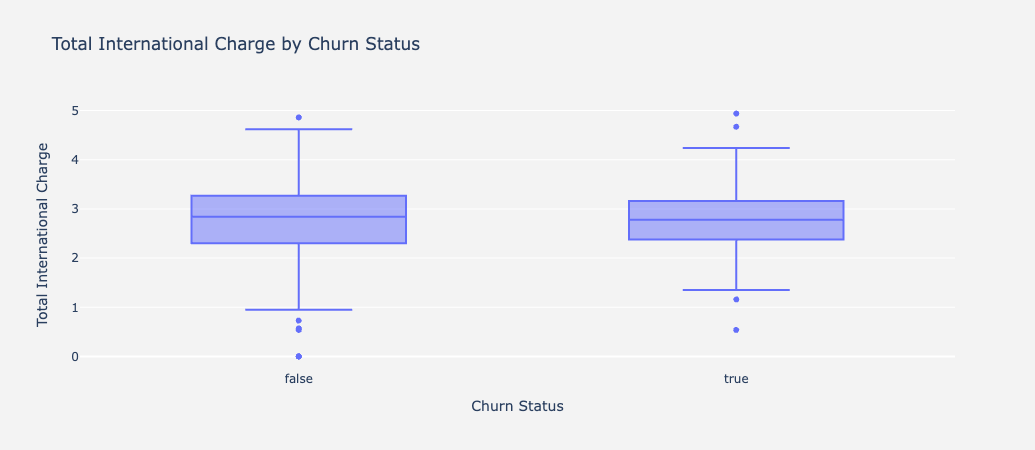

In [34]:
def plot_boxplot_intl_charge(df):
    """
    Create a boxplot using Plotly for the 'Total International Charge' feature by 'Churn' status.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Total intl charge'
                    and 'Churn' columns.

    Returns:
    None
    """
    fig = px.box(df, x='Churn', y='Total intl charge', title="Total International Charge by Churn Status",
                 labels={"Churn": "Churn Status", "Total intl charge": "Total International Charge"},
                 category_orders={"Churn": ["False", "True"]})

    fig.update_layout(plot_bgcolor='rgb(243,243,243)', paper_bgcolor='rgb(243,243,243)')

    fig.show()

plot_boxplot_intl_charge(df)

**Key Findings**

**Range of International Call Charges**:

* **Maximum Charge**: The highest charge for a single international call session was $4.94. This indicates that some customers are likely engaging in longer or more frequent international calls, possibly due to personal or business needs.

* **Minimum Charge**: At the lower end, the minimum charge was $0.0, suggesting that a segment of our customer base does not utilize international calling services at all.

* **Average Charge**: The average international call charge across our customers was approximately $2.76. This moderate average suggests a balanced use of international calling services among those who do use them.

**Implications for Customer Engagement and Churn**:

* **High Charges and Potential Dissatisfaction**: Customers experiencing higher charges may perceive these costs as too steep, especially if they do not see a proportional value in the service. This perception could potentially lead to customer dissatisfaction and increased churn.

* **Low Engagement and Underutilization**: The existence of customers with zero charges reflects underutilization of international calling services. This could be due to a lack of awareness about the availability of these services or a perception that they are not necessary or cost-effective.

### Inference on Churn According to States

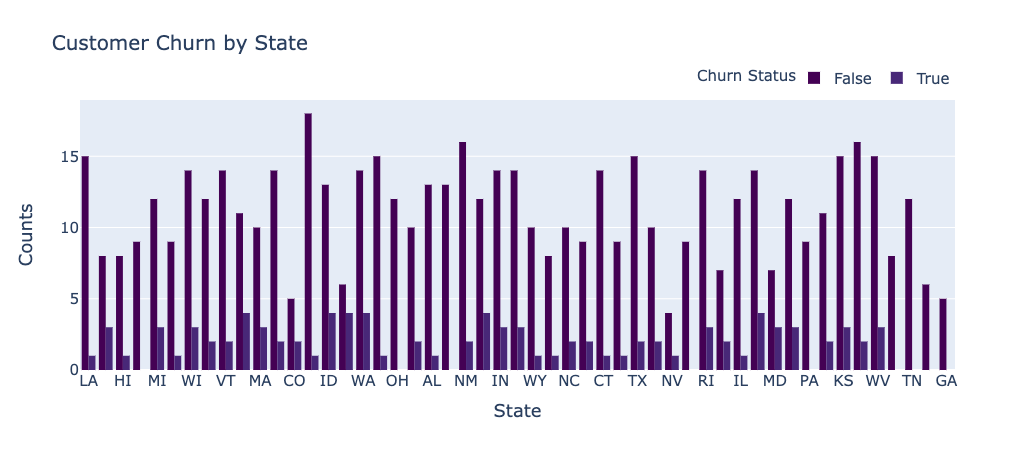

In [35]:
def plot_churn_by_state(df):
    """
    Create a bar chart using Plotly to show the counts of churn and non-churn customers by state.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'State' and 'Churn' columns.

    Returns:
    None
    """
    fig = px.histogram(df, x='State', color='Churn', barmode='group',
                       title='Customer Churn by State',
                       labels={'Churn': 'Churn Status', 'State': 'State'},
                       color_discrete_sequence=px.colors.sequential.Viridis)  # Updated color sequence
    
    fig.update_layout(
        xaxis_title='State',
        yaxis_title='Counts',
        legend_title_text='Churn Status',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        font=dict(size=15),
        title_font=dict(size=20)
    )
    
    fig.show()

plot_churn_by_state(df)

**Key Observations**

**Elevated Churn Rates in Specific States**: Notably, Texas and Maryland have emerged as areas with higher churn rates compared to other states. Such a trend indicates localized issues that may be influencing customer decisions to leave our services.

**Potential Causes for Higher Churn**: The increased churn in these areas could be attributed to several factors, such as network quality, customer service experiences, competitive offerings by other providers, or demographic shifts affecting usage patterns.

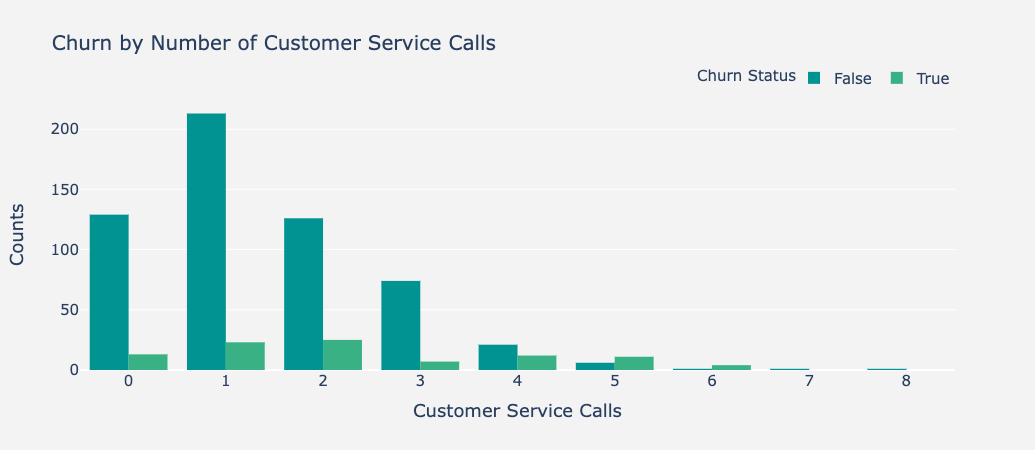

In [36]:
def plot_customer_service_calls_churn(df):
    """
    Create a bar chart using Plotly to show the counts of churn and non-churn customers by number of customer service calls.

    Parameters:
    df (DataFrame): Input DataFrame containing the data to plot, which must include 'Customer service calls' and 'Churn' columns.

    Returns:
    None
    """
    fig = px.histogram(df, x='Customer service calls', color='Churn', barmode='group',
                       title='Churn by Number of Customer Service Calls',
                       labels={'Churn': 'Churn Status', 'Customer service calls': 'Customer Service Calls'},
                       color_discrete_sequence=px.colors.diverging.Temps)  # Mid-range color palette
    
    fig.update_layout(
        xaxis_title='Customer Service Calls',
        yaxis_title='Counts',
        legend_title_text='Churn Status',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        font=dict(size=15),
        title_font=dict(size=20),
        plot_bgcolor='rgb(243,243,243)',
        paper_bgcolor='rgb(243,243,243)'
    )
    
    fig.show()

plot_customer_service_calls_churn(df)

**Key Observations**

**The Lure of Quick Fixes**: A notable number of customers with zero service calls have switched providers. This suggests a segment of our customer base may prefer a 'quick fix' solution, opting to change services rather than addressing issues.

**The Critical First Contact**: The data also indicates a high churn rate among customers who have made only one service call. This trend underscores the potential that their issues were not resolved satisfactorily on the first attempt, leading to frustration and a loss of trust in our ability to resolve their concerns.

In [37]:
def convert_boolean_to_int(df, column_name):
    """
    Convert a boolean column to an integer column, with True as 1 and False as 0.

    Parameters:
    df (DataFrame): The DataFrame containing the boolean column to convert.
    column_name (str): The name of the column to convert.

    Returns:
    DataFrame: The DataFrame with the specified column converted to integers.
    """
    df[column_name] = df[column_name].astype(int)
    
    return df

df = convert_boolean_to_int(df, 'Churn')

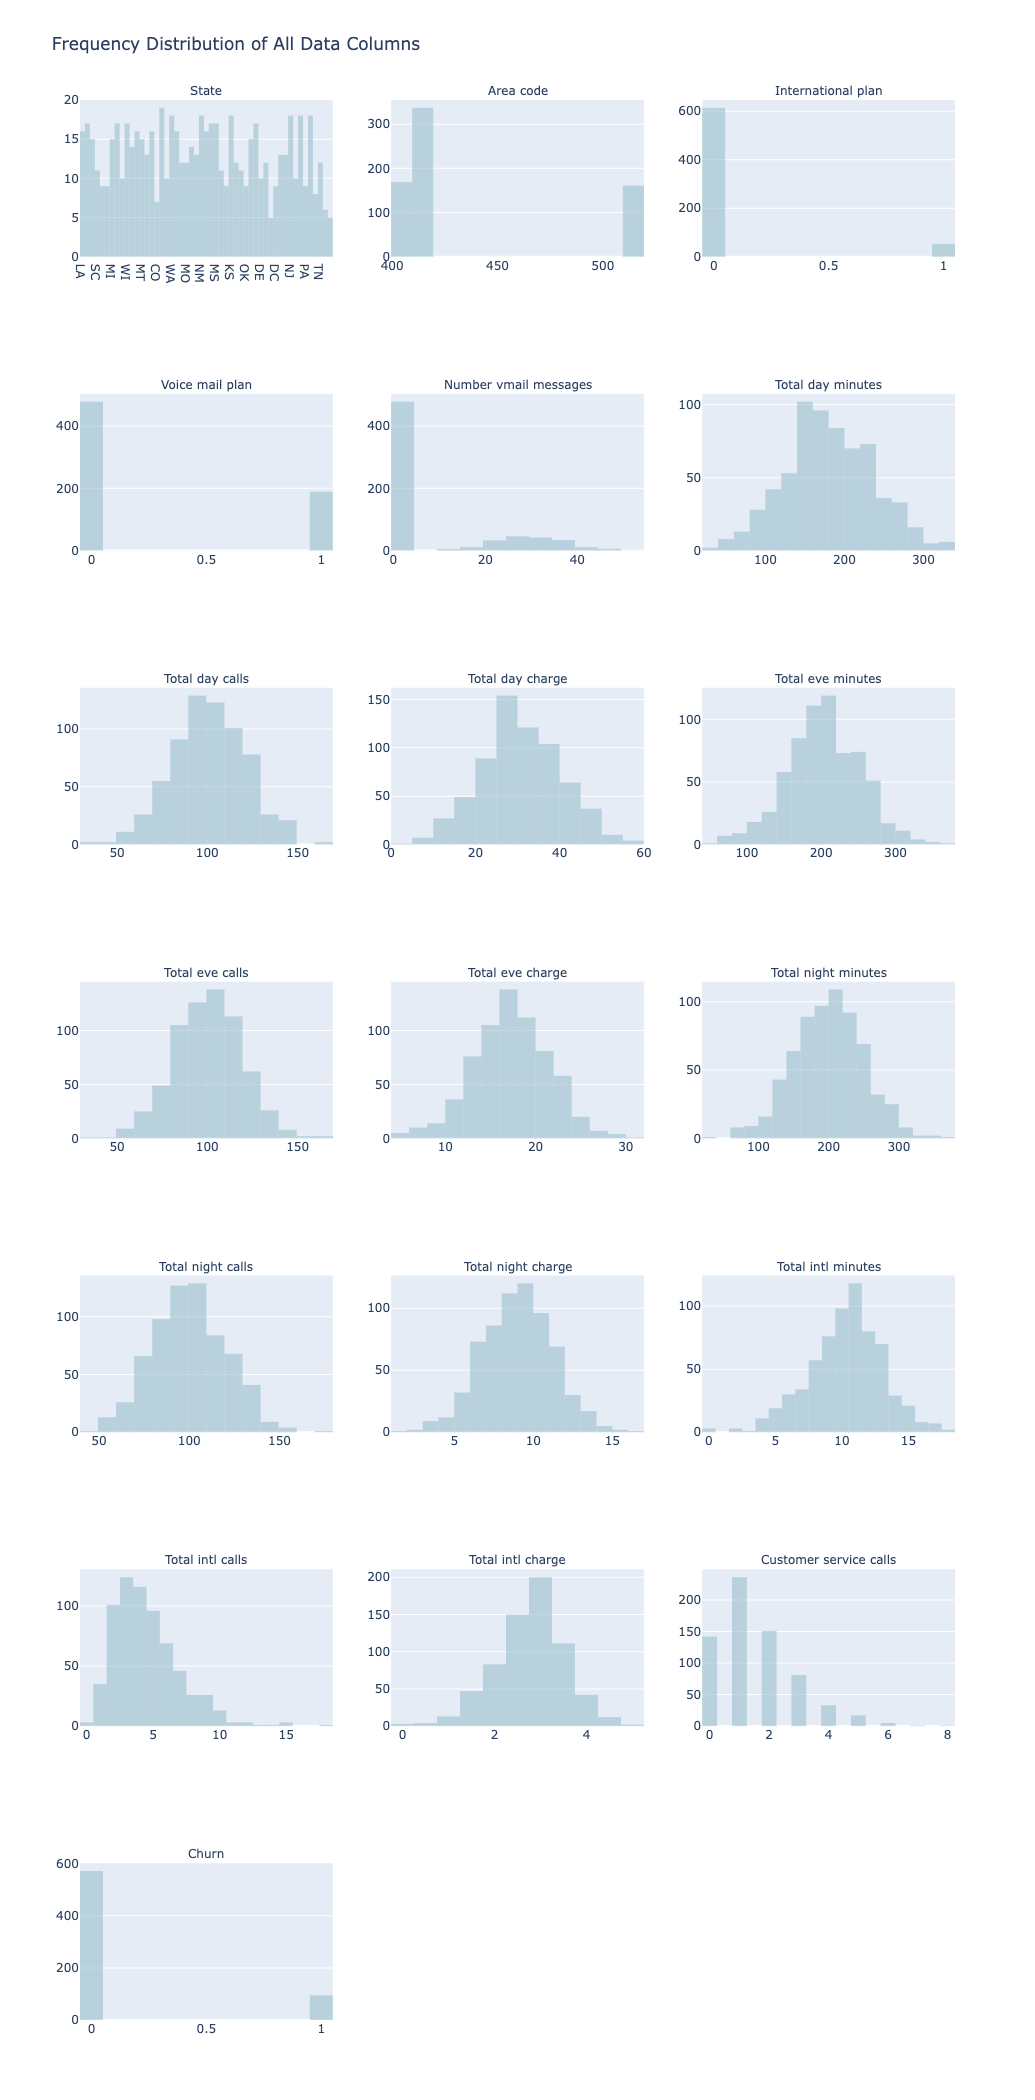

In [38]:
def plot_histograms(df):
    """
    Create histograms for all columns in the DataFrame using Plotly.

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.

    Returns:
    None
    """
    num_columns = len(df.columns)
    cols_per_row = 3  
    rows = math.ceil(num_columns / cols_per_row)

    fig = make_subplots(rows=rows, cols=cols_per_row, subplot_titles=df.columns)

    for i, column in enumerate(df.columns, 1):
        row = math.ceil(i / cols_per_row)
        col = (i - 1) % cols_per_row + 1
        
        fig.add_trace(
            go.Histogram(x=df[column], nbinsx=20, marker_color='rgba(153, 191, 204, 0.6)'),
            row=row, col=col
        )


    fig.update_layout(
        height=300*rows,  
        showlegend=False,
        title_text="Frequency Distribution of All Data Columns"
    )

    for i in range(num_columns):
        fig.layout.annotations[i].font.size = 12 
    
    # Show the plot
    fig.show()

plot_histograms(df)

In [39]:
def extract_time_of_day_features(df):
    """
    Extracts different time-of-day call features and churn status from the DataFrame and prints the DataFrame columns.

    Parameters:
    df (DataFrame): The original DataFrame containing all data.

    Returns:
    tuple: A tuple containing the DataFrames for day, evening, night, and international features, respectively.
    """

    day_df = df[['Total day minutes', 'Total day calls', 'Total day charge', 'Churn']]
    eve_df = df[['Total eve minutes', 'Total eve calls', 'Total eve charge', 'Churn']]
    night_df = df[['Total night minutes', 'Total night calls', 'Total night charge', 'Churn']]
    intl_df = df[['Total intl minutes', 'Total intl calls', 'Total intl charge', 'Churn']]

    
    return day_df, eve_df, night_df, intl_df

day_df, eve_df, night_df, intl_df = extract_time_of_day_features(df)
print(df.columns)


Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')


### Data Correlation

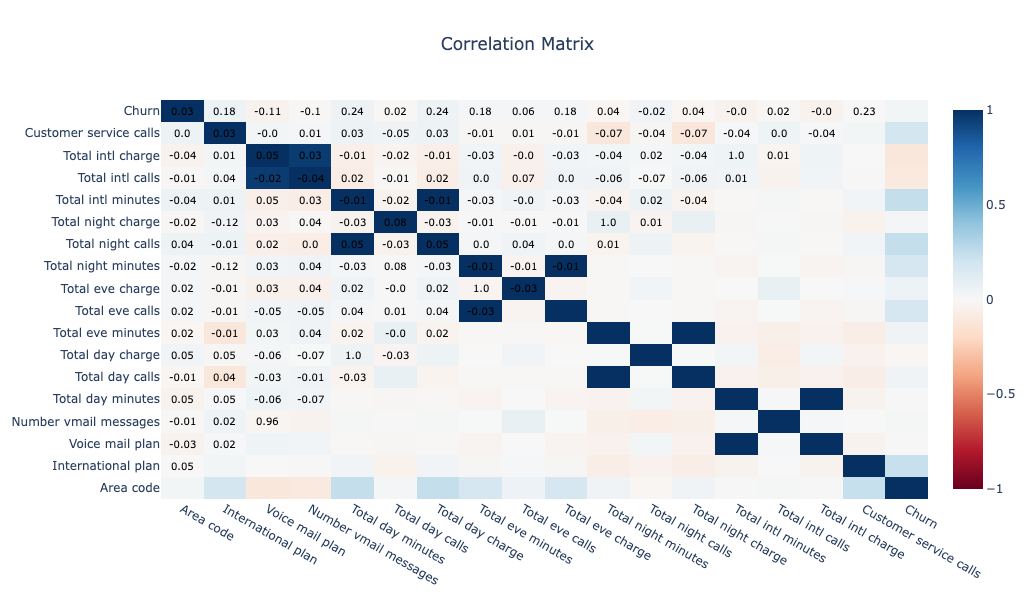

In [40]:
def plot_correlation_matrix(df):
    """
    Creates a correlation matrix heatmap using Plotly for the given DataFrame, ignoring non-numeric columns.

    Parameters:
    df (DataFrame): The DataFrame for which the correlation matrix should be computed.

    Returns:
    None
    """

    numeric_df = df.select_dtypes(include=[np.number])

    corr = numeric_df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    layout = go.Layout(
        title='Correlation Matrix',
        title_x=0.5,
        width=800, 
        height=600,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        yaxis_autorange='reversed',
        template='plotly_white',
        hovermode='closest'
    )

    heatmap = go.Heatmap(
        z=corr.to_numpy(),
        x=corr.columns,
        y=corr.columns[::-1], 
        colorscale='RdBu',
        zmid=0, 
        showscale=True
    )

    annotations = []
    for i in range(len(corr.columns)):
        for j in range(i):
            annotations.append(
                go.layout.Annotation(
                    text=str(np.round(corr.iloc[i, j], 2)),
                    x=corr.columns[j],
                    y=corr.columns[i],
                    xref='x1',
                    yref='y1',
                    showarrow=False,
                    font=dict(color='black', size=10)
                )
            )

    layout.update(annotations=annotations)

    fig = go.Figure(data=[heatmap], layout=layout)

    fig.update_yaxes(autorange="reversed")

    fig.show()

plot_correlation_matrix(df)

# Prediction

### Training Our Model using Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [42]:
def prepare_train_test_data(df, target_column, test_size=0.25, random_state=111):
    """
    Splits the DataFrame into training and testing sets and separates features from the target variable.

    Parameters:
    df (DataFrame): The DataFrame containing the data to split.
    target_column (str): The name of the target variable column.
    test_size (float): The proportion of the dataset to include in the test split.
    random_state (int): The seed used by the random number generator.

    Returns:
    tuple: A tuple containing training and testing sets for both features and target.
    """

    train, test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    X = df.drop(['State', target_column], axis=1)
    cols = X.columns
    train_X = train[cols]
    train_Y = train[target_column]
    test_X = test[cols]
    test_Y = test[target_column]
    
    return train, test, X, train_X, train_Y, test_X, test_Y,cols

target_col = ['Churn']
train, test, X, train_X, train_Y, test_X, test_Y, cols= prepare_train_test_data(df, 'Churn')

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       149
           1       0.18      0.11      0.14        18

    accuracy                           0.85       167
   macro avg       0.54      0.53      0.53       167
weighted avg       0.82      0.85      0.83       167

Accuracy   Score :  0.8502994011976048
Area under curve :  0.5253542132736764 



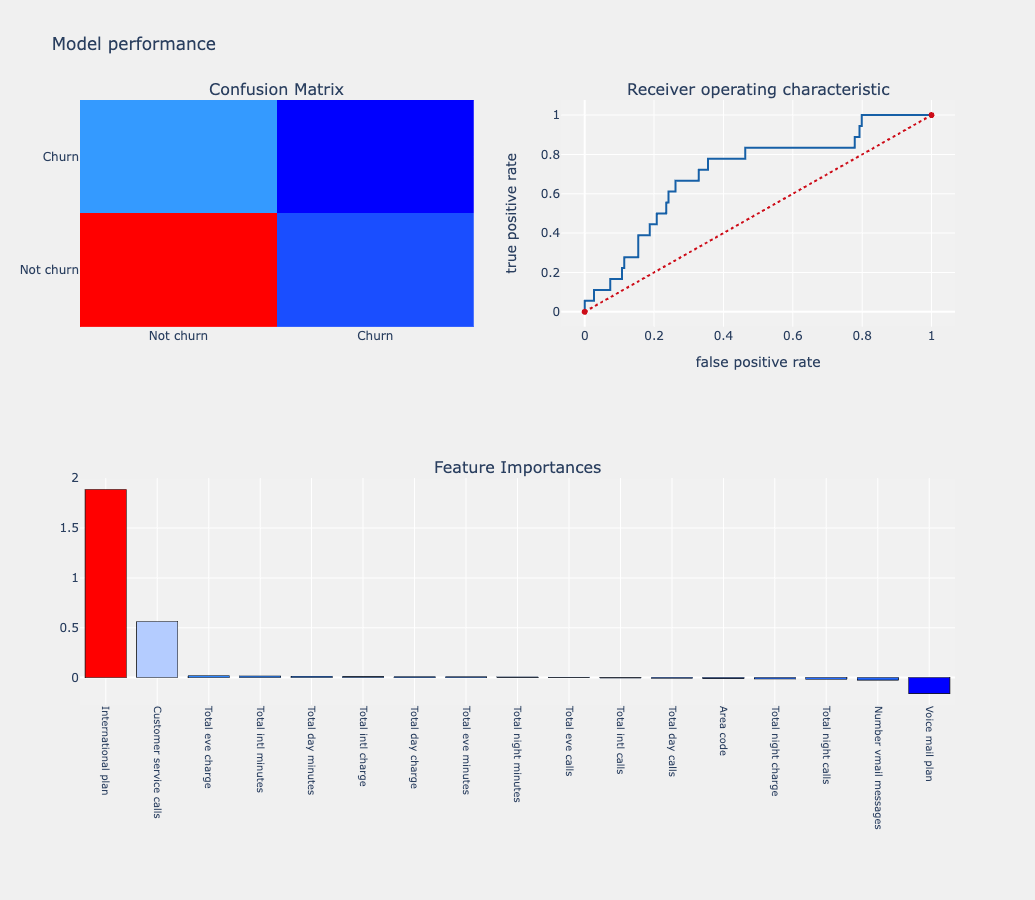

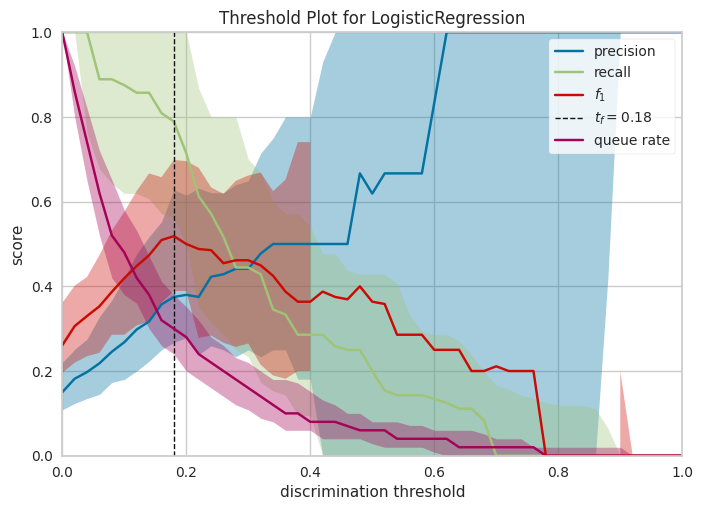

In [43]:
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    conf_matrix = confusion_matrix(testing_y,predictions)
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

Given the significant imbalance present within our dataset, it is critical to address this issue to ensure that our predictive models perform optimally and without bias towards the majority class. To tackle this challenge, we plan to implement an oversampling technique. This approach will increase the representation of the underrepresented class in the dataset by duplicating some of its examples. By doing so, we aim to balance the class distribution and subsequently evaluate the impact of this adjustment on the model's performance. This step is crucial for improving the reliability and fairness of our predictions

### SMOTE

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       149
           1       0.18      0.11      0.14        18

    accuracy                           0.85       167
   macro avg       0.54      0.53      0.53       167
weighted avg       0.82      0.85      0.83       167

Accuracy   Score :  0.8502994011976048
Area under curve :  0.5253542132736764 



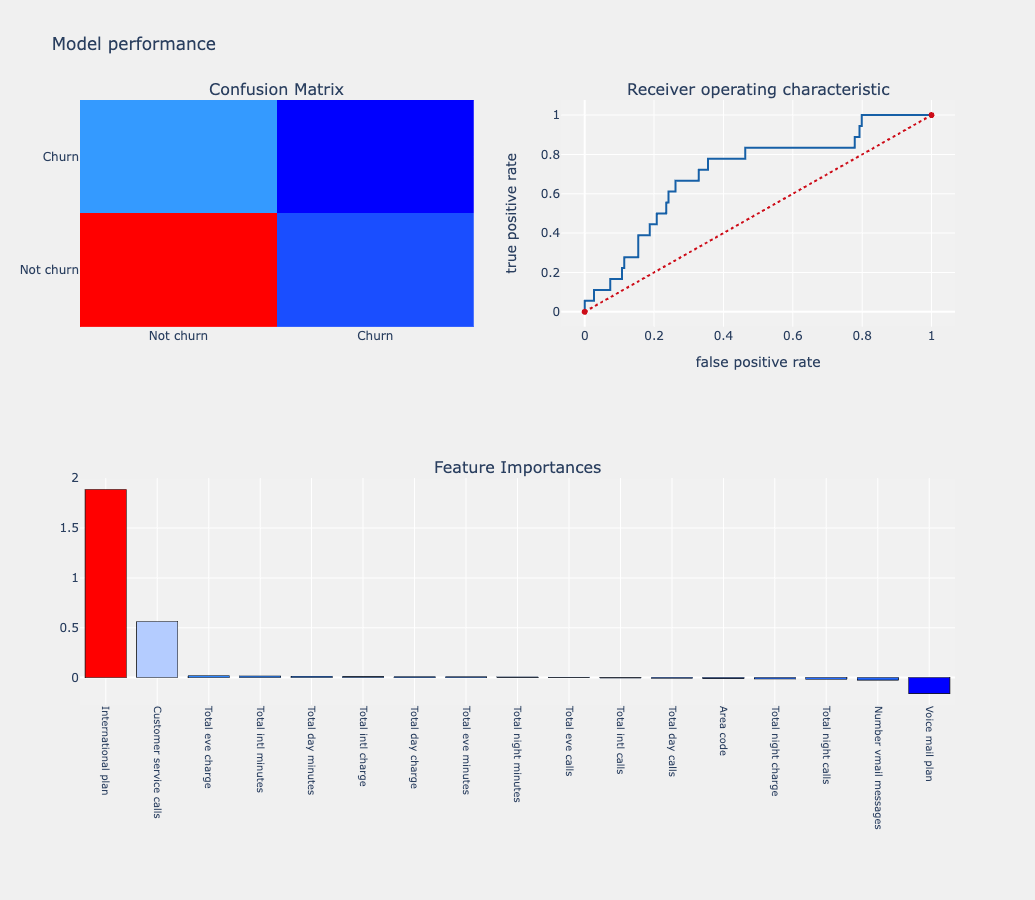

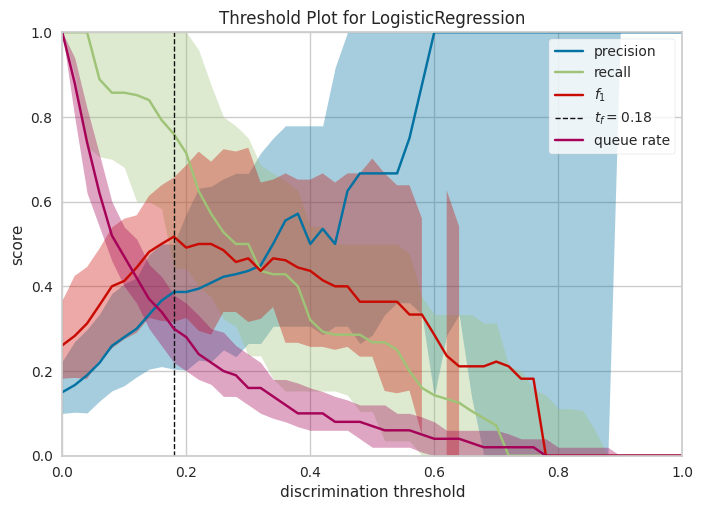

In [44]:
from imblearn.over_sampling import SMOTE

def run_smote_logistic_regression(df, feature_columns, target_column):
    """
    Handles an imbalanced dataset by applying SMOTE, then trains a logistic regression model
    on the oversampled data.

    Parameters:
    df (DataFrame): The DataFrame containing the dataset.
    feature_columns (list): List of column names to be used as features.
    target_column (str): The name of the target variable column.

    Returns:
    model: The trained logistic regression model.
    """
    smote_X = df[feature_columns]
    smote_Y = df[target_column]

    smote_train_X, smote_test_X, smote_train_Y, smote_test_Y = train_test_split(
        smote_X, smote_Y, test_size=0.25, random_state=111)

    os = SMOTE(random_state=0)
    os_smote_X, os_smote_Y = os.fit_resample(smote_train_X, smote_train_Y)
    os_smote_X = pd.DataFrame(data=os_smote_X, columns=feature_columns)
    os_smote_Y = pd.DataFrame(data=os_smote_Y, columns=[target_column])

    logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                     intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                     penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                     verbose=0, warm_start=False)
    logit_smote.fit(os_smote_X, os_smote_Y.values.ravel())

    return logit_smote,os_smote_X,os_smote_Y

feature_columns = cols
target_column = "Churn"
logit_smote,os_smote_X,os_smote_Y  = run_smote_logistic_regression(df, feature_columns, target_column)
telecom_churn_prediction(logit_smote,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

Employing SMOTE (Synthetic Minority Over-sampling Technique) for addressing the imbalance in our dataset has proven to be beneficial, particularly in enhancing the recall metric, which is crucial for our analysis. Recall is a critical performance metric in scenarios where the cost of missing a positive instance (such as failing to identify a customer likely to churn) is high. By effectively increasing the number of samples from the minority class (churned customers) through synthetic data generation, SMOTE helps to ensure that our predictive models are not biased towards the majority class. This approach improves our model’s ability to correctly identify actual instances of churn, thereby increasing the recall. Such an improvement is vital for deploying effective intervention strategies aimed at retaining customers, as it ensures that fewer churned customers go unnoticed by the predictive model.

### SMOTE and RFE and Logistic Regression

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.74      0.84       149
           1       0.25      0.72      0.38        18

    accuracy                           0.74       167
   macro avg       0.61      0.73      0.61       167
weighted avg       0.88      0.74      0.79       167

Accuracy   Score :  0.7425149700598802
Area under curve :  0.7335943325876211 



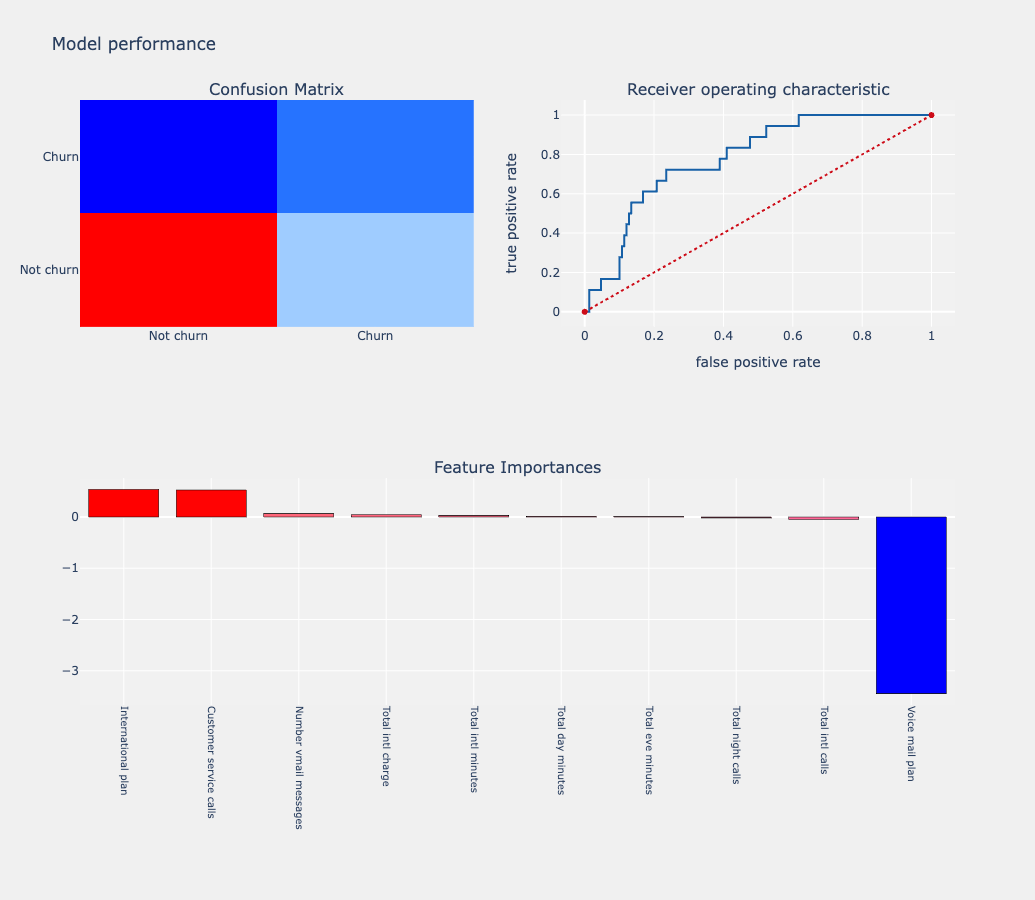

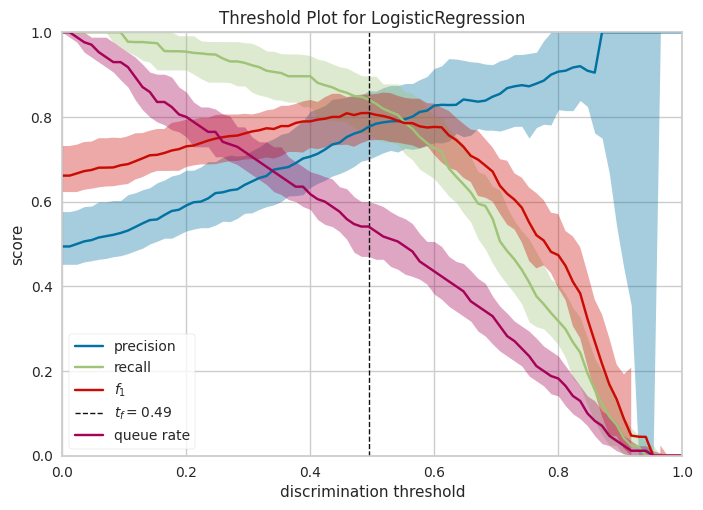

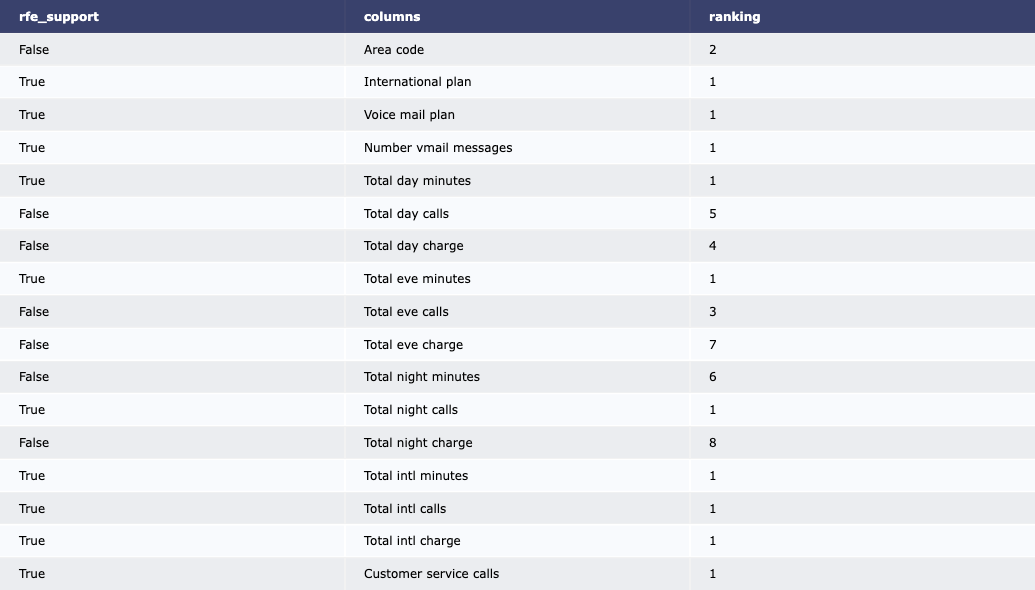

In [45]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(estimator=logit, n_features_to_select=10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : X.columns,
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

Utilizing SMOTE (Synthetic Minority Over-sampling Technique) in conjunction with Recursive Feature Elimination (RFE) through a Logistic Regression model has shown to significantly enhance our analytical outcomes. The integration of SMOTE addresses the imbalance in our dataset by artificially increasing the representation of the underrepresented class. This adjustment not only improves model accuracy but also ensures a fair analysis by giving equal importance to all classes.

Furthermore, applying RFE allows us to refine our model by identifying and retaining only the most impactful features. Through RFE, each feature is evaluated and ranked based on its importance in predicting customer churn, thereby simplifying the model and potentially improving its performance by eliminating redundancy and noise. This systematic approach to feature selection contributes to more robust, efficient, and interpretable model outcomes. By combining these methodologies, we are able to construct a predictive model that is both accurate and reliable, making it a valuable tool for strategic decision-making in customer retention initiatives.

### Checking the Scores with other Models and Choosing the Best One!

In [46]:
os_smote_X,test_X,os_smote_Y,test_Y

(     Area code  International plan  Voice mail plan  Number vmail messages  \
 0          415                   0                0                      0   
 1          415                   0                0                      0   
 2          510                   0                0                      0   
 3          408                   0                0                      0   
 4          415                   0                0                      0   
 ..         ...                 ...              ...                    ...   
 841        510                   0                0                      0   
 842        408                   0                0                      0   
 843        415                   0                0                     13   
 844        414                   0                0                     28   
 845        411                   0                0                     14   
 
      Total day minutes  Total day calls  Total da

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

gnb = GaussianNB(priors=None)

svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)


xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth=7, min_child_weight=1, missing=-999, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )

rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")


def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    
    return df



model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(BLM)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SM)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)


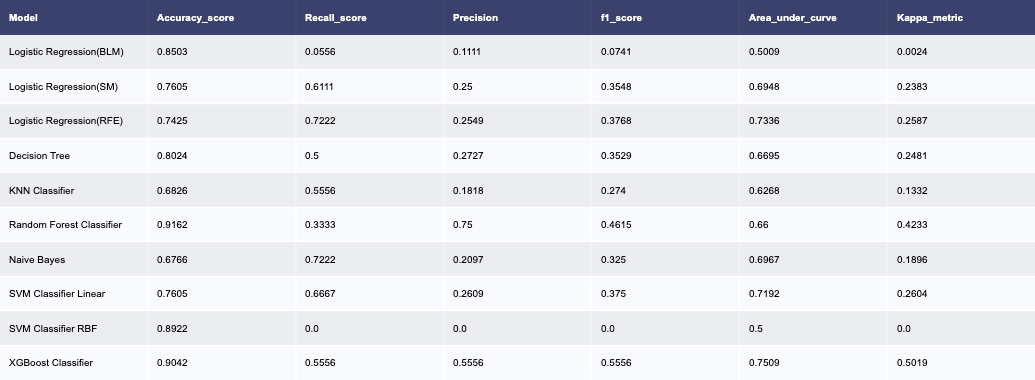

In [48]:
fig = ff.create_table(np.round(model_performances,4))

fig.update_layout(
    font=dict(
        size=10,  
        family="Arial, sans-serif" 
    ))

fig.show()

The performance metrics presented in the table clearly suggest that boosting algorithms and tree-based models outperform other machine learning models for this specific dataset. Among the contenders, the XGBoost classifier emerges as the superior model. This is substantiated by its higher scores across several key performance indicators.

To gain a comprehensive understanding and to ensure the robustness of our conclusion, it would be prudent to evaluate the XGBoost model using additional metrics. By examining a broader spectrum of metrics, we can affirm the model's predictive power and reliability. This thorough evaluation will help in confirming the XGBoost model's efficacy in generalizing its predictions to unseen data, thereby solidifying its standing as the optimal choice for this particular analytical task.

# Model Performances

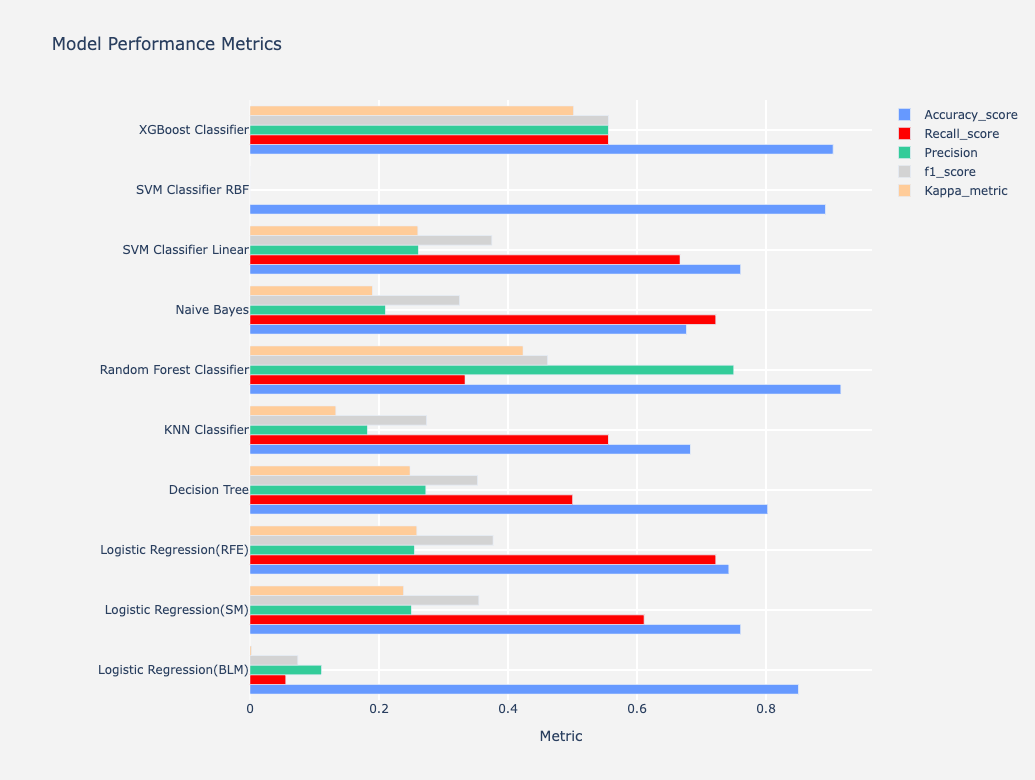

In [49]:
def plot_model_performances(model_performances):
    """
    Plots a horizontal bar chart displaying various performance metrics for different models.
    
    Parameters:
    model_performances (DataFrame): A DataFrame with model names and their corresponding performance metrics.
    """
    
    layout = go.Layout(
        title="Model Performance Metrics",
        plot_bgcolor="rgb(243,243,243)",
        paper_bgcolor="rgb(243,243,243)",
        xaxis=dict(gridcolor='rgb(255, 255, 255)',
                   title="Metric",
                   zerolinewidth=1,
                   ticklen=5,
                   gridwidth=2),
        yaxis=dict(gridcolor='rgb(255, 255, 255)',
                   zerolinewidth=1,
                   ticklen=5,
                   gridwidth=2),
        margin=dict(l=250),
        height=780
    )
    
    metrics_colors = {
        "Accuracy_score": "#6699FF",
        "Recall_score": "red",
        "Precision": "#33CC99",
        "f1_score": "lightgrey",
        "Kappa_metric": "#FFCC99"
    }
    
    traces = []
    for metric, color in metrics_colors.items():
        tracer = go.Bar(
            y=model_performances["Model"],
            x=model_performances[metric],
            orientation="h",
            name=metric,
            marker=dict(line=dict(width=.7), color=color)
        )
        traces.append(tracer)

    fig = go.Figure(data=traces, layout=layout)
    
    fig.show()

plot_model_performances(model_performances)

The XGBoost model stands out as the most accurate and reliable among the tested algorithms, delivering the best scores in key performance metrics including R1 score, precision, recall, and the kappa statistic, which collectively affirm its superior predictive capabilities and the robustness of its classifications.

## Plotting Confusion Matrix of all models

In [50]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,xgc]

In [51]:
mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 
          'XGBoost Classifier']

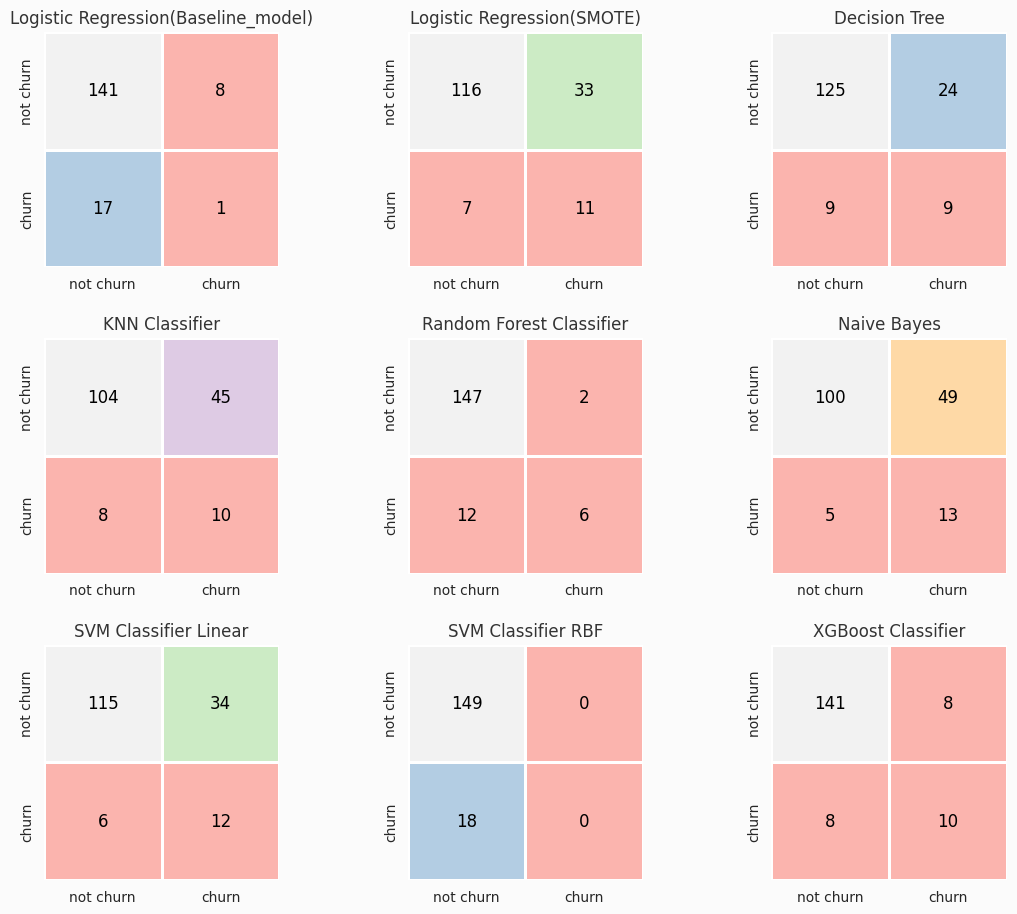

In [52]:
def plot_confusion_matrices(models, model_names, test_X, test_Y):
    """
    Plots confusion matrices for a list of models.

    Parameters:
    models (list): List of trained model objects.
    model_names (list): List of model names as strings corresponding to 'models'.
    test_X (DataFrame): Features from the test dataset.
    test_Y (Series): Target from the test dataset.
    """
    length = len(models)
    
    fig = plt.figure(figsize=(13, 15))
    fig.set_facecolor("#FBFBFB")  

    for model, idx, name in itertools.zip_longest(models, range(length), model_names):
        plt.subplot(4, 3, idx + 1)
        predictions = model.predict(test_X)
        conf_matrix = confusion_matrix(test_Y, predictions)  
        
        sns.heatmap(conf_matrix, annot=True, fmt="d", square=True,
                    xticklabels=["not churn", "churn"],
                    yticklabels=["not churn", "churn"],
                    linewidths=2, linecolor="#FFFFFF", cmap="Pastel1",
                    cbar=False, 
                    annot_kws={"color":"#000000"}) 
        
        plt.title(name, color="#333333") 

        plt.subplots_adjust(wspace=.3, hspace=.3)

    plt.show()

plot_confusion_matrices(lst, mods, test_X, test_Y)

Well we want our model to predict churn customers correctly and XGBoost is exceptional to our metric evaluation

## Evaluating ROC Metric

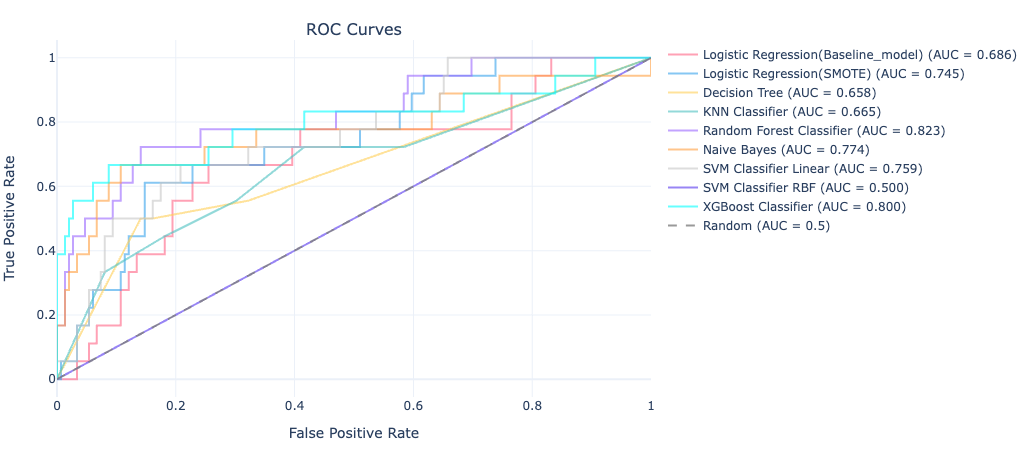

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curves(models, model_names, test_X, test_Y):

    fig = make_subplots(rows=1, cols=1, subplot_titles=('ROC Curves',))

    colors = [
        'rgba(255, 99, 132, 0.6)', 'rgba(54, 162, 235, 0.6)', 
        'rgba(255, 206, 86, 0.6)', 'rgba(75, 192, 192, 0.6)',
        'rgba(153, 102, 255, 0.6)', 'rgba(255, 159, 64, 0.6)',
        'rgba(199, 199, 199, 0.6)', 'rgba(83, 51, 237, 0.6)',
        'rgba(0, 255, 255, 0.6)', 'rgba(255, 80, 255, 0.6)'
    ]
    
    for idx, (model, name) in enumerate(zip(models, model_names)):
        probabilities = model.predict_proba(test_X)[:, 1]
        fpr, tpr, _ = roc_curve(test_Y, probabilities)
        auc = roc_auc_score(test_Y, probabilities)
        
        fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{name} (AUC = {auc:.3f})',
                                 line=dict(color=colors[idx % len(colors)], width=2)),
                      row=1, col=1)

    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', 
                             name='Random (AUC = 0.5)',
                             line=dict(color='rgba(128, 128, 128, 0.8)', dash='dash')), 
                  row=1, col=1)

    fig.update_layout(template='plotly_white',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      margin=dict(l=40, r=40, t=40, b=40))

    fig.show()


plot_roc_curves(lst, mods, test_X, test_Y)

# Conclusions
## We can definitely suggest to prevent churn :
<b><li> Upgrading network to improve services for long duration users.
  <b><li> Updating Pricing Strategies.
    <b><li>Updating and Optimizing Internationall Call Rates.
     <b><li> Implmenting a better network infrastructure in Maryland and Texas Areas where there is more Churn Rate.
      <b><li>Upgrading their services when in emegenvy only in evening period as low network traffic.<b>

## We can Predict using:
<b><li> If we want to predict churn rate  correctly, then Tree based classification using SMOTE would be recommended.
 <b><li> XGBoost Classifier Performs best and would be a recommended Model.